In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the train dataset

In [3]:
import pandas as pd
df_train=pd.read_csv('train.csv')  #Path location of the dataset
df_train.head()  #Checking out the top 5 rows of the dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
df_train.shape    #Checking the dimensions of the dataset

(1168, 81)

In [5]:
df_train.columns   #Checking out the columns of the dataset

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### df_train.info()    #Checking the info of all the columns present

We can see that there are float, int and object data type and we need to handle the categorical data in further analysis

In [6]:
df_train.isnull().sum().sort_values(ascending=False).head(30)   #Checking for null values in the dataset for top 30 columns

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageYrBlt       64
GarageFinish      64
GarageType        64
GarageQual        64
GarageCond        64
BsmtExposure      31
BsmtFinType2      31
BsmtQual          30
BsmtCond          30
BsmtFinType1      30
MasVnrType         7
MasVnrArea         7
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

There are 1161 missing values in the column PoolQC, 1124 in MiscFeature, 11091 in Alley, 931 in Fence, 551 in FireplaceQu,214 in LotFrontage, 64 each in GarageType, GarageCond, GarageYrBlt, GarageFinish, GarageQual, 31 in BsmtExposure and BsmtFinType2, 30 in BsmtCond and BsmtQual, 7 in MasVnrArea and MasVnrType present in our dataset. We need to handle these null values

# Data pre-processing


In [7]:
#Checking the value counts of categorical data
for column in df_train.columns:
    if df_train[column].dtypes == object:
        print(str(column) + ' : ' + str(df_train[column].unique()))
        print(df_train[column].value_counts())
        print('\n')

MSZoning : ['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street : ['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley : [nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape : ['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities : ['AllPub']
AllPub    1168
Name: Utilities, dtype: int64


LotConfig : ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope : ['Gtl' 'Mod' 'Sev']
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood : ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDal

### Observations:

1. There is only one unique value present in utilities column,so that we will be dropping it.


2. In categorical columns there are missing values present in columns Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.

In [8]:
#Dropping Utilities column
df_train.drop(['Utilities'],axis=1,inplace=True)

In [9]:
#Dropping other unnecessary columns in the dataset
df_train.drop('Id',axis=1,inplace=True)  # id column not necessary for prediction
df_train.drop('PoolArea',axis=1,inplace=True) # contains same value in every row
df_train.drop('PoolQC',axis=1,inplace=True) # contains same value in every row

# Checking the percentage of missing data

In [10]:
def missing_values_table(df_train):
    mis_val = df_train.isnull().sum()
    mis_val_percent = 100 * df_train.isnull().sum() / len(df_train)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df_train.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(df_train)

Your selected dataframe has 77 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
MiscFeature,1124,96.2
Alley,1091,93.4
Fence,931,79.7
FireplaceQu,551,47.2
LotFrontage,214,18.3
GarageType,64,5.5
GarageYrBlt,64,5.5
GarageFinish,64,5.5
GarageQual,64,5.5
GarageCond,64,5.5


# Handling missing data

In [11]:
basement=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
#NA means No_Basement for all i in basement. Let's replace NAs with 'No_Basement'
for i in basement:
    df_train[i].fillna('No_Basement',inplace=True)
    print(df_train[i].value_counts())
    
#As per given definition, NA means None. Let's replace NAs with 'None'
df_train['MiscFeature'].fillna('None',inplace=True)
print(df_train['MiscFeature'].value_counts())

#As per given definition, NA means No_alley_access. Let's replace missing data with 'No_alley_access'
df_train['Alley'].fillna('No_alley_access',inplace=True)
print(df_train['Alley'].value_counts())

#As per given definition, NA means No_Fence. Let's replace missing data with 'No_Fence'
df_train['Fence'].fillna('No_Fence',inplace=True)
print(df_train['Fence'].value_counts())

#NA means No_Fireplace. Let's replace missing data with 'No_Fireplace'
df_train['FireplaceQu'].fillna('No_Fireplace',inplace=True)
print(df_train['FireplaceQu'].value_counts())

#Let's Impute the missing values and replace it with the median
df_train['LotFrontage'].fillna(df_train['LotFrontage'].median(),inplace=True)

garage=['GarageType','GarageFinish','GarageQual','GarageCond']
#NA means No_Garage for all i in garage
for i in garage:
    df_train[i].fillna('No_Garage',inplace=True)
    print(df_train[i].value_counts())
    
#As per dataframe "df" we can say that most of the rows of GarageYrBlt has same value as YearBuilt so we replace with that
df_train["GarageYrBlt"]=df_train["GarageYrBlt"].fillna(df_train["YearBuilt"])
print(df_train['GarageYrBlt'].value_counts())    
    
#As per given values of MasVnrArea,  Let's replace missing data with 0's
df_train['MasVnrArea'].fillna(0,inplace=True)
print(df_train['MasVnrArea'].value_counts())

#Let's fill the missing values in MasVnrType with None
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')

TA             517
Gd             498
Ex              94
No_Basement     30
Fa              29
Name: BsmtQual, dtype: int64
TA             1041
Gd               56
Fa               39
No_Basement      30
Po                2
Name: BsmtCond, dtype: int64
No             756
Av             180
Gd             108
Mn              93
No_Basement     31
Name: BsmtExposure, dtype: int64
Unf            345
GLQ            330
ALQ            174
BLQ            121
Rec            109
LwQ             59
No_Basement     30
Name: BsmtFinType1, dtype: int64
Unf            1002
Rec              43
LwQ              40
No_Basement      31
BLQ              24
ALQ              16
GLQ              12
Name: BsmtFinType2, dtype: int64
None    1124
Shed      40
Gar2       2
TenC       1
Othr       1
Name: MiscFeature, dtype: int64
No_alley_access    1091
Grvl                 41
Pave                 36
Name: Alley, dtype: int64
No_Fence    931
MnPrv       129
GdPrv        51
GdWo         47
MnWw         10
Name:

In [12]:
#Checking again if missing values present in train dateset
df_train.isnull().values.any()

False

We can see that the missing data has been handled in the dataset and when we checked the dataset again, there is no missing data present

# Exploratory Data Analysis

In [13]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis

In [14]:
#Taking the categorical data alone and analysing it
categorical=[x for x in df_train.columns if df_train[x].dtype==object]

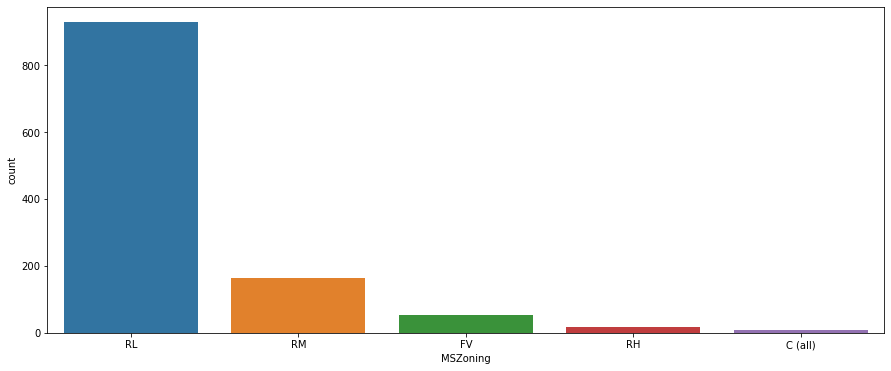

Value counts:

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Percentage of data: 

RL         79.0
RM         14.0
FV          4.0
RH          1.0
C (all)     1.0
Name: MSZoning, dtype: float64 2


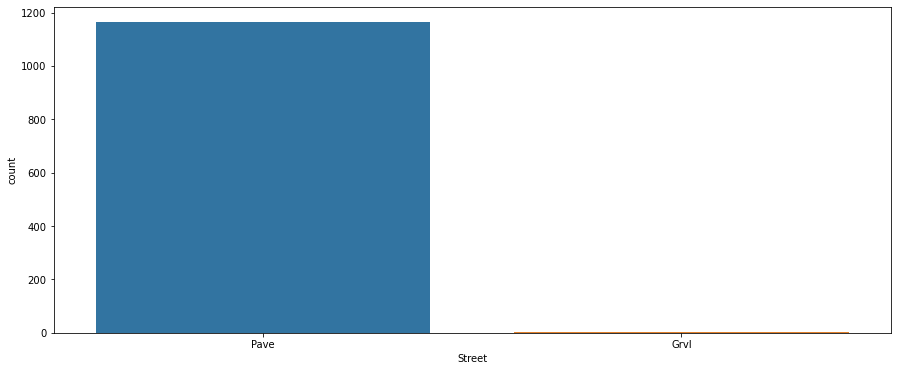

Value counts:

Pave    1164
Grvl       4
Name: Street, dtype: int64


Percentage of data: 

Pave    100.0
Grvl      0.0
Name: Street, dtype: float64 2


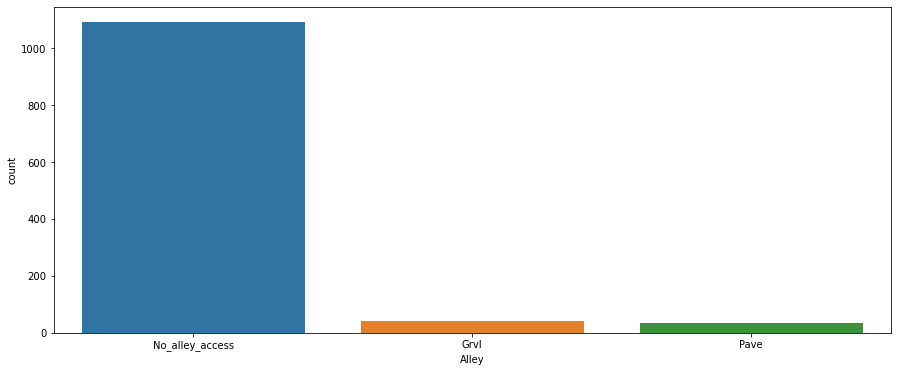

Value counts:

No_alley_access    1091
Grvl                 41
Pave                 36
Name: Alley, dtype: int64


Percentage of data: 

No_alley_access    93.0
Grvl                4.0
Pave                3.0
Name: Alley, dtype: float64 2


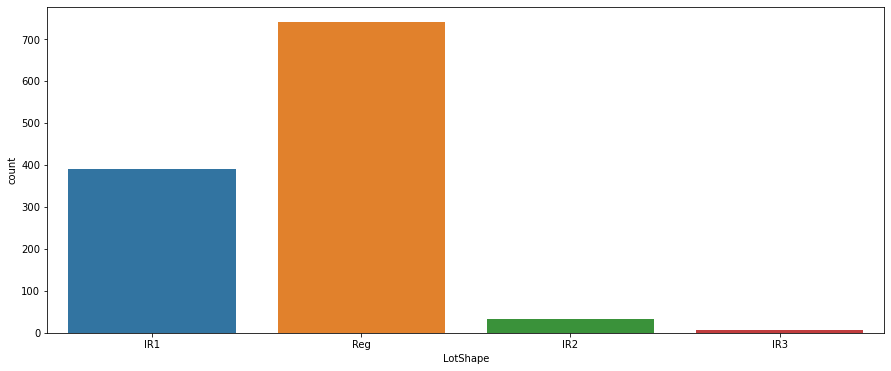

Value counts:

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


Percentage of data: 

Reg    63.0
IR1    33.0
IR2     3.0
IR3     1.0
Name: LotShape, dtype: float64 2


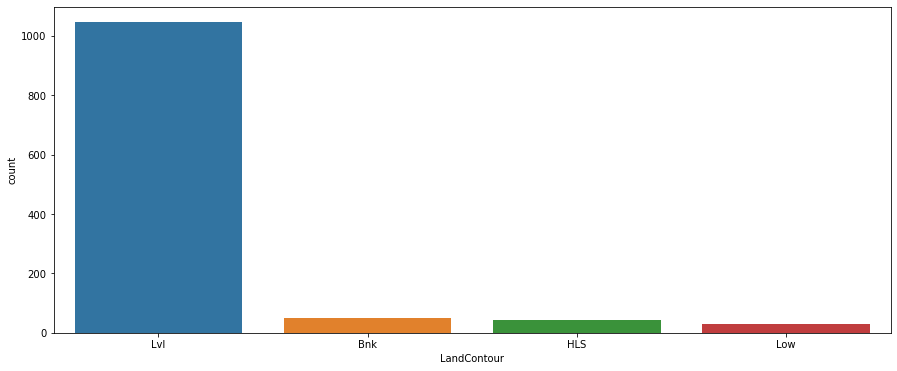

Value counts:

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Percentage of data: 

Lvl    90.0
Bnk     4.0
HLS     4.0
Low     3.0
Name: LandContour, dtype: float64 2


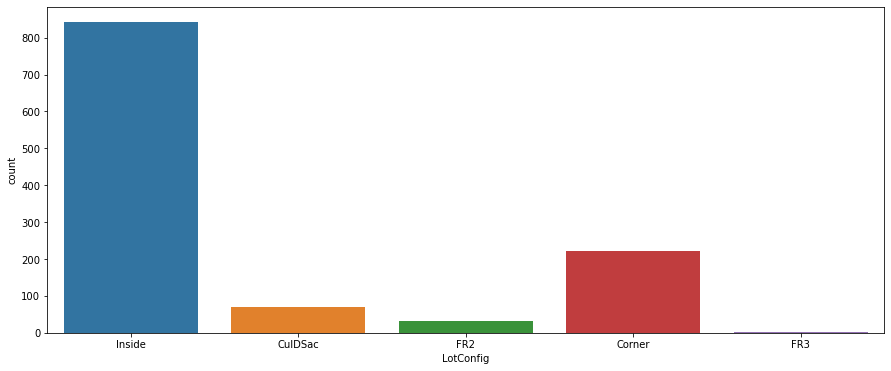

Value counts:

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


Percentage of data: 

Inside     72.0
Corner     19.0
CulDSac     6.0
FR2         3.0
FR3         0.0
Name: LotConfig, dtype: float64 2


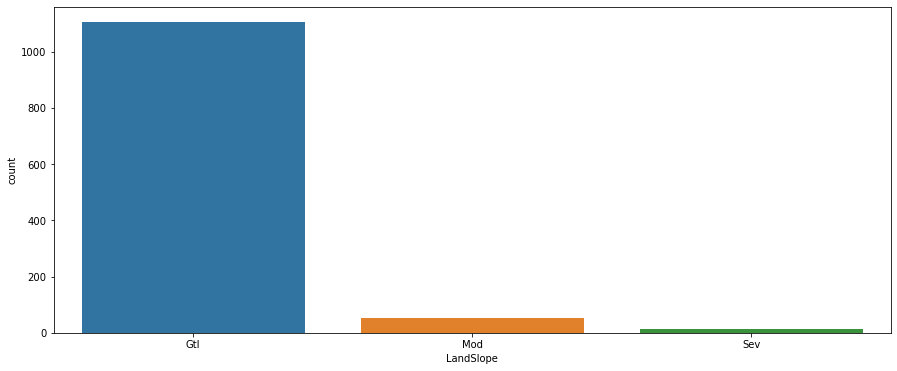

Value counts:

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Percentage of data: 

Gtl    95.0
Mod     4.0
Sev     1.0
Name: LandSlope, dtype: float64 2


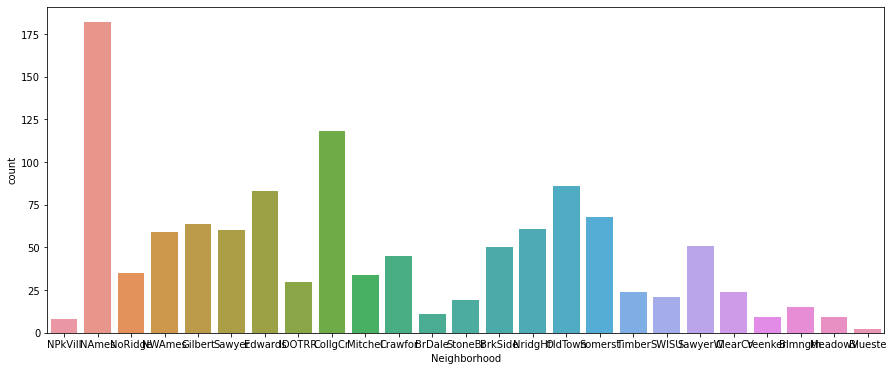

Value counts:

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


Percentage of data: 

NAmes      16.0
CollgCr    10.0
OldTown     7.0
Edwards     7.0
Somerst     6.0
Gilbert     5.0
NridgHt     5.0
Sawyer      5.0
NWAmes      5.0
SawyerW     4.0
BrkSide     4.0
Crawfor     4.0
NoRidge     3.0
Mitchel     3.0
IDOTRR      3.0
Timber      2.0
ClearCr     2.0
SWISU       2.0
StoneBr     2.0
Blmngtn     1.0
BrDale      1.0
MeadowV     1.0
Veenker     1.0
NPkVill     1.0
Blueste     0.0
Name: Neighborhood, dtype: float64 2


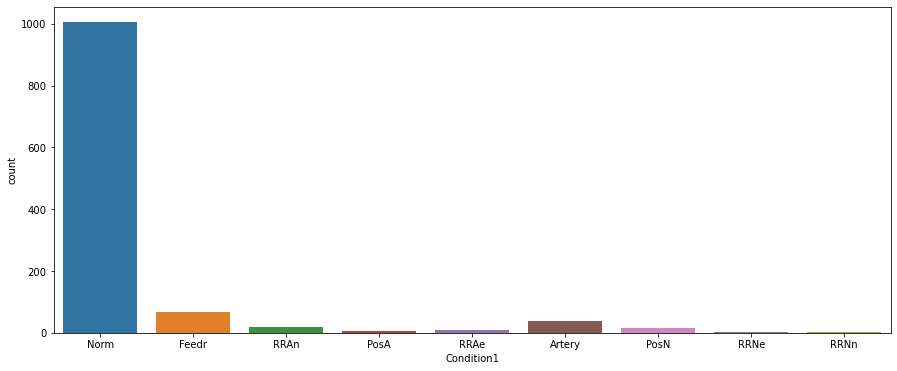

Value counts:

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


Percentage of data: 

Norm      86.0
Feedr      6.0
Artery     3.0
RRAn       2.0
PosN       1.0
RRAe       1.0
PosA       1.0
RRNn       0.0
RRNe       0.0
Name: Condition1, dtype: float64 2


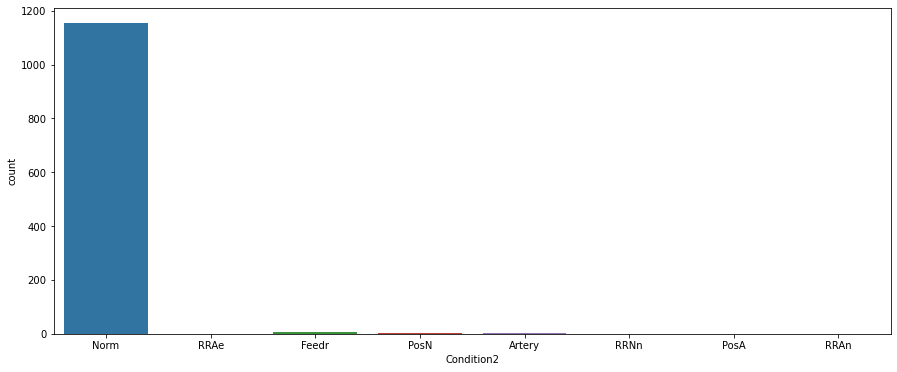

Value counts:

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64


Percentage of data: 

Norm      99.0
Feedr      1.0
PosN       0.0
Artery     0.0
RRAe       0.0
RRNn       0.0
PosA       0.0
RRAn       0.0
Name: Condition2, dtype: float64 2


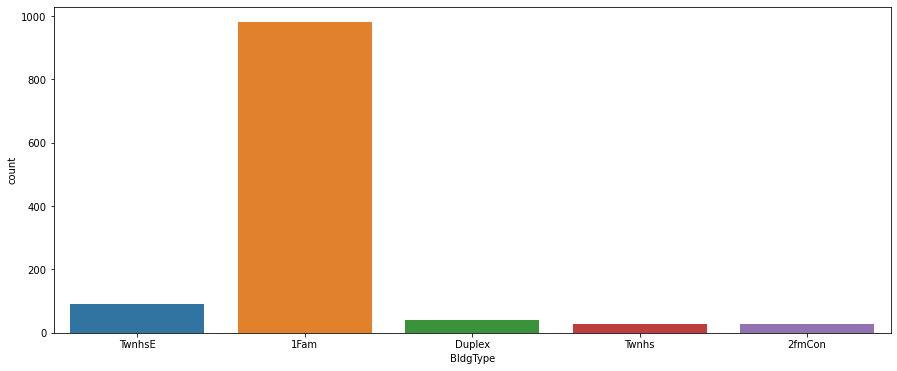

Value counts:

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


Percentage of data: 

1Fam      84.0
TwnhsE     8.0
Duplex     4.0
Twnhs      2.0
2fmCon     2.0
Name: BldgType, dtype: float64 2


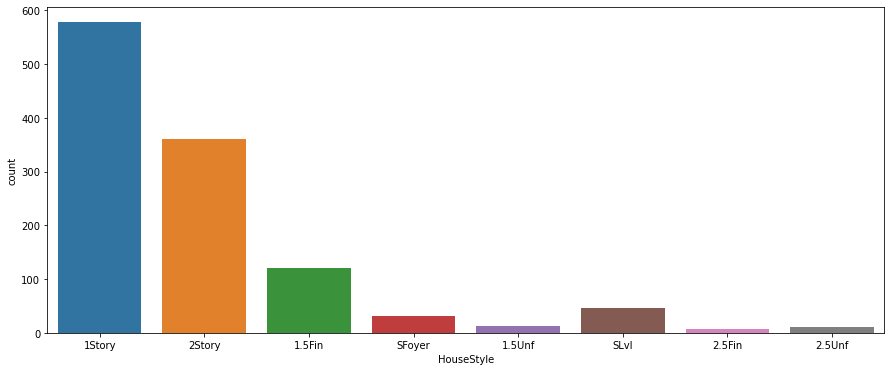

Value counts:

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


Percentage of data: 

1Story    49.0
2Story    31.0
1.5Fin    10.0
SLvl       4.0
SFoyer     3.0
1.5Unf     1.0
2.5Unf     1.0
2.5Fin     1.0
Name: HouseStyle, dtype: float64 2


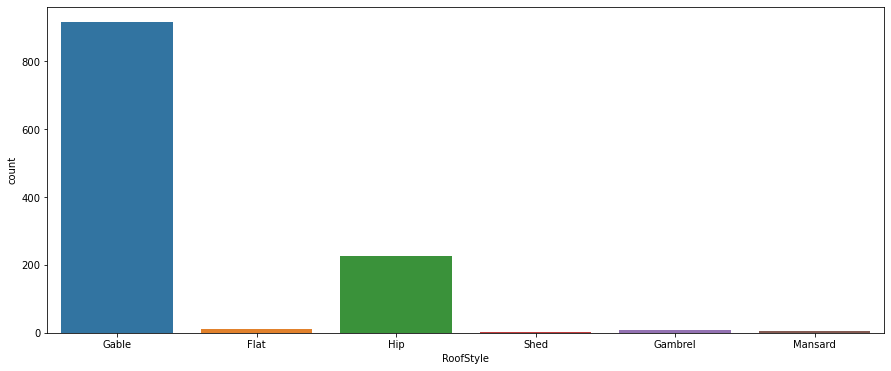

Value counts:

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


Percentage of data: 

Gable      78.0
Hip        19.0
Flat        1.0
Gambrel     1.0
Mansard     0.0
Shed        0.0
Name: RoofStyle, dtype: float64 2


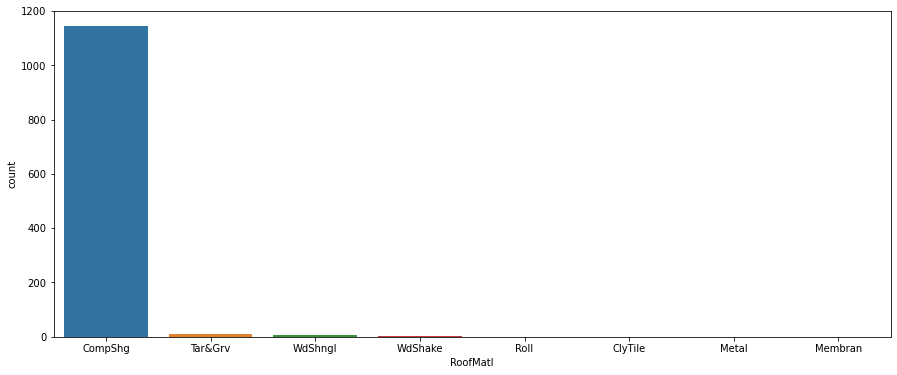

Value counts:

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64


Percentage of data: 

CompShg    98.0
Tar&Grv     1.0
WdShngl     1.0
WdShake     0.0
Roll        0.0
ClyTile     0.0
Metal       0.0
Membran     0.0
Name: RoofMatl, dtype: float64 2


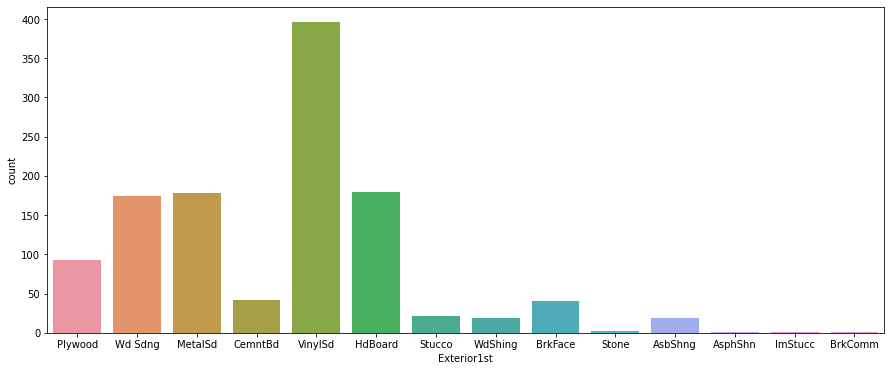

Value counts:

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
AsphShn      1
ImStucc      1
BrkComm      1
Name: Exterior1st, dtype: int64


Percentage of data: 

VinylSd    34.0
HdBoard    15.0
MetalSd    15.0
Wd Sdng    15.0
Plywood     8.0
CemntBd     4.0
BrkFace     4.0
Stucco      2.0
WdShing     2.0
AsbShng     2.0
Stone       0.0
AsphShn     0.0
ImStucc     0.0
BrkComm     0.0
Name: Exterior1st, dtype: float64 2


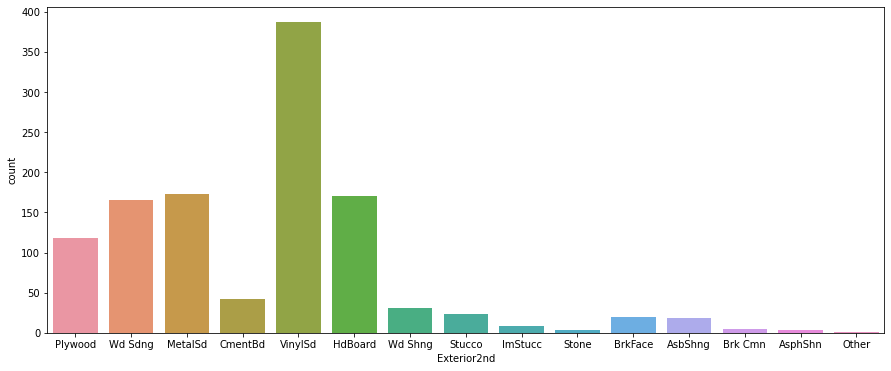

Value counts:

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


Percentage of data: 

VinylSd    33.0
MetalSd    15.0
HdBoard    15.0
Wd Sdng    14.0
Plywood    10.0
CmentBd     4.0
Wd Shng     3.0
Stucco      2.0
BrkFace     2.0
AsbShng     2.0
ImStucc     1.0
Brk Cmn     0.0
Stone       0.0
AsphShn     0.0
Other       0.0
Name: Exterior2nd, dtype: float64 2


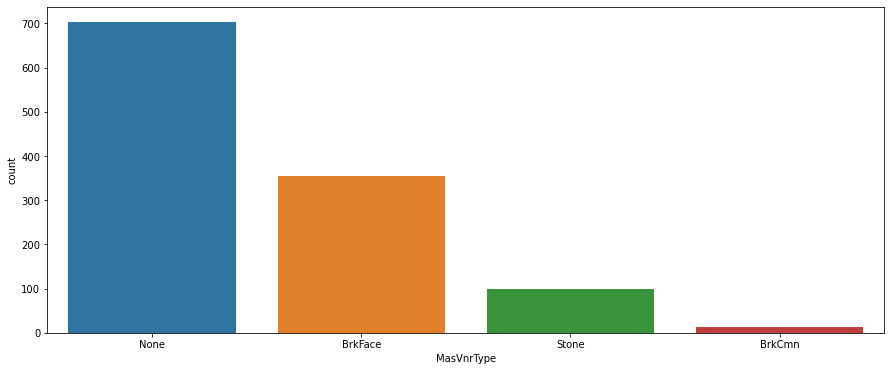

Value counts:

None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


Percentage of data: 

None       60.0
BrkFace    30.0
Stone       8.0
BrkCmn      1.0
Name: MasVnrType, dtype: float64 2


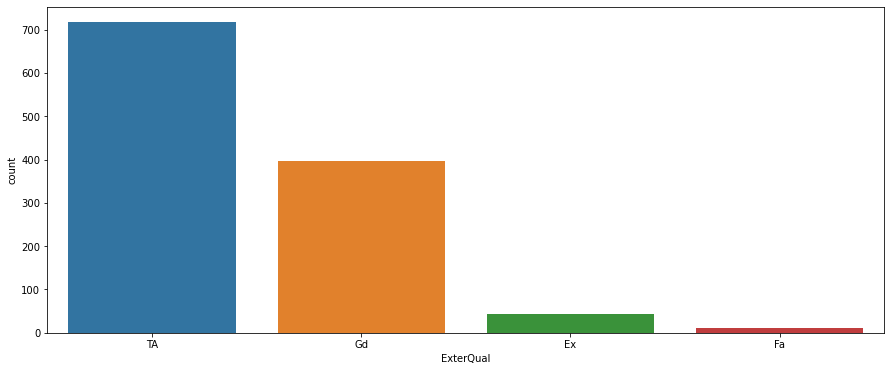

Value counts:

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


Percentage of data: 

TA    61.0
Gd    34.0
Ex     4.0
Fa     1.0
Name: ExterQual, dtype: float64 2


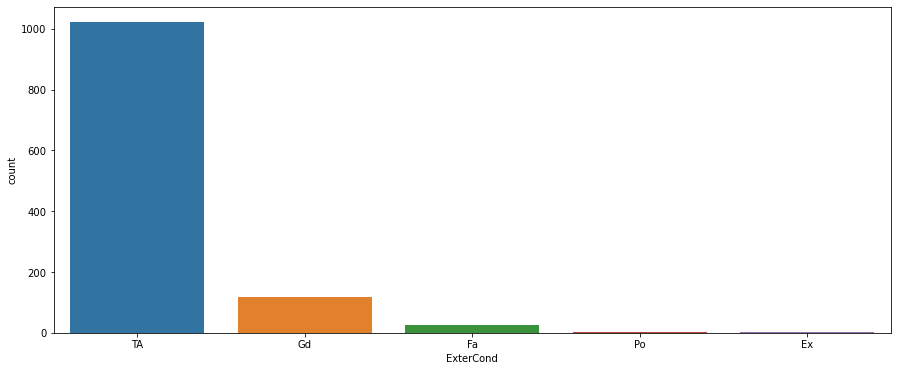

Value counts:

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


Percentage of data: 

TA    88.0
Gd    10.0
Fa     2.0
Ex     0.0
Po     0.0
Name: ExterCond, dtype: float64 2


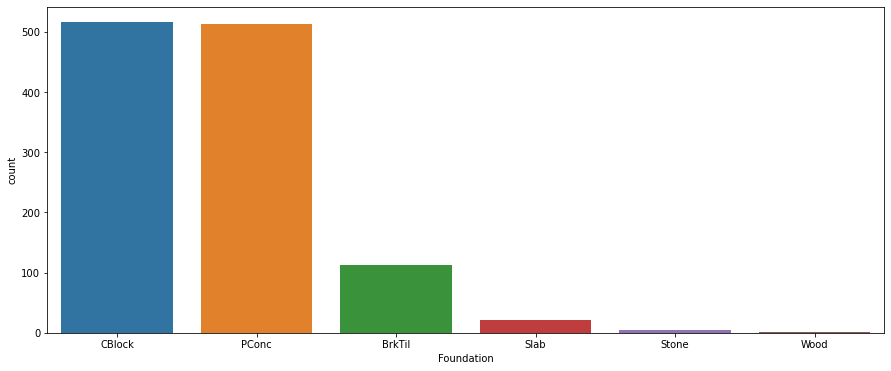

Value counts:

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


Percentage of data: 

CBlock    44.0
PConc     44.0
BrkTil    10.0
Slab       2.0
Stone      0.0
Wood       0.0
Name: Foundation, dtype: float64 2


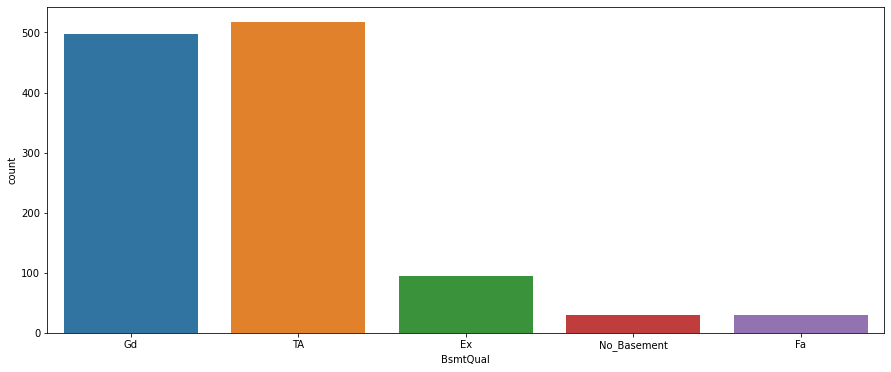

Value counts:

TA             517
Gd             498
Ex              94
No_Basement     30
Fa              29
Name: BsmtQual, dtype: int64


Percentage of data: 

TA             44.0
Gd             43.0
Ex              8.0
No_Basement     3.0
Fa              2.0
Name: BsmtQual, dtype: float64 2


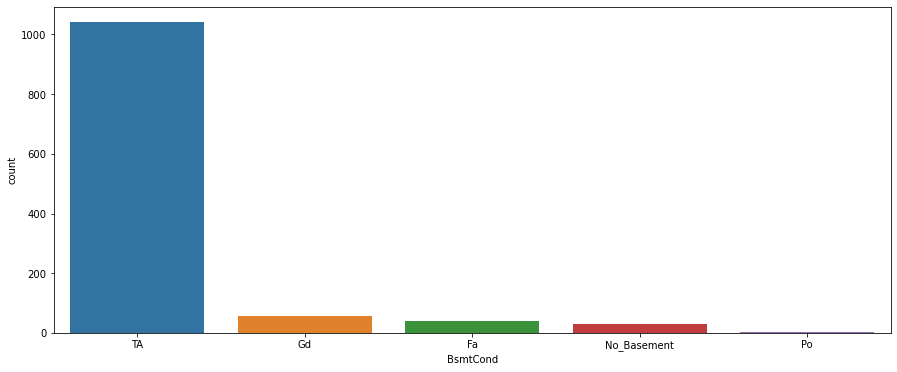

Value counts:

TA             1041
Gd               56
Fa               39
No_Basement      30
Po                2
Name: BsmtCond, dtype: int64


Percentage of data: 

TA             89.0
Gd              5.0
Fa              3.0
No_Basement     3.0
Po              0.0
Name: BsmtCond, dtype: float64 2


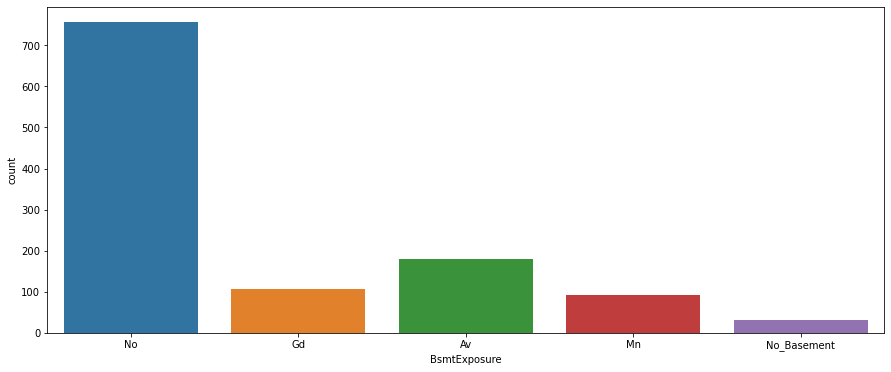

Value counts:

No             756
Av             180
Gd             108
Mn              93
No_Basement     31
Name: BsmtExposure, dtype: int64


Percentage of data: 

No             65.0
Av             15.0
Gd              9.0
Mn              8.0
No_Basement     3.0
Name: BsmtExposure, dtype: float64 2


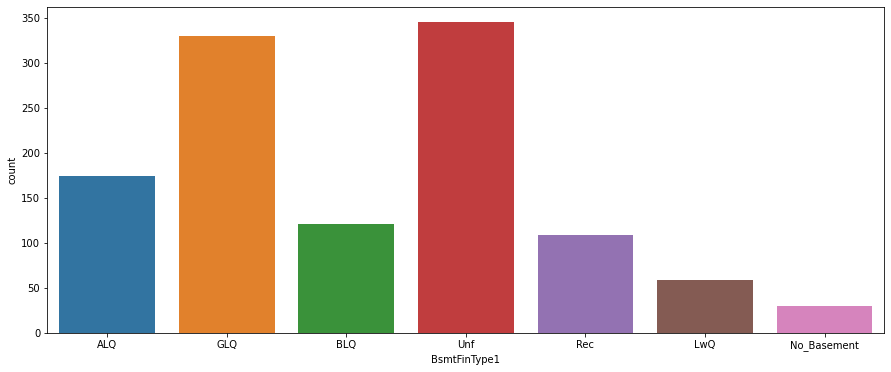

Value counts:

Unf            345
GLQ            330
ALQ            174
BLQ            121
Rec            109
LwQ             59
No_Basement     30
Name: BsmtFinType1, dtype: int64


Percentage of data: 

Unf            30.0
GLQ            28.0
ALQ            15.0
BLQ            10.0
Rec             9.0
LwQ             5.0
No_Basement     3.0
Name: BsmtFinType1, dtype: float64 2


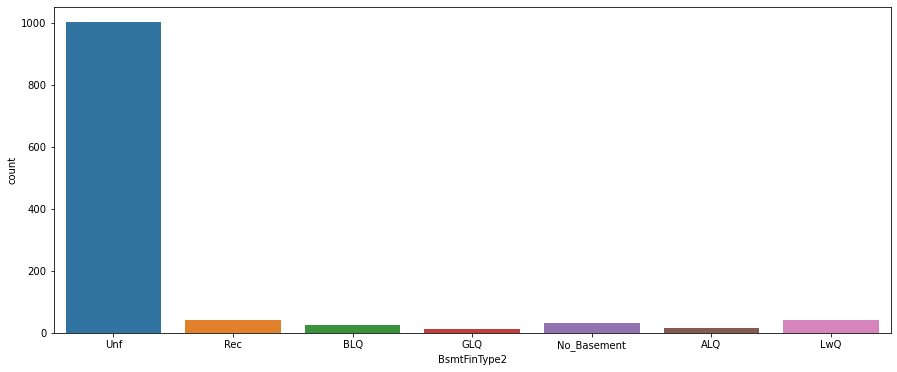

Value counts:

Unf            1002
Rec              43
LwQ              40
No_Basement      31
BLQ              24
ALQ              16
GLQ              12
Name: BsmtFinType2, dtype: int64


Percentage of data: 

Unf            86.0
Rec             4.0
LwQ             3.0
No_Basement     3.0
BLQ             2.0
ALQ             1.0
GLQ             1.0
Name: BsmtFinType2, dtype: float64 2


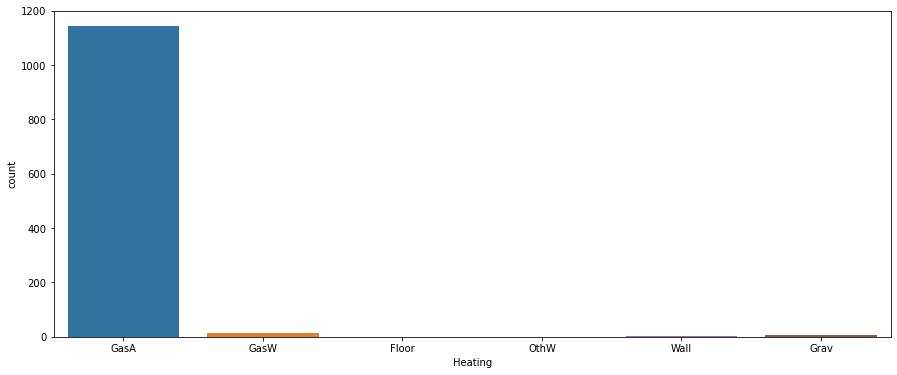

Value counts:

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


Percentage of data: 

GasA     98.0
GasW      1.0
Grav      0.0
Wall      0.0
Floor     0.0
OthW      0.0
Name: Heating, dtype: float64 2


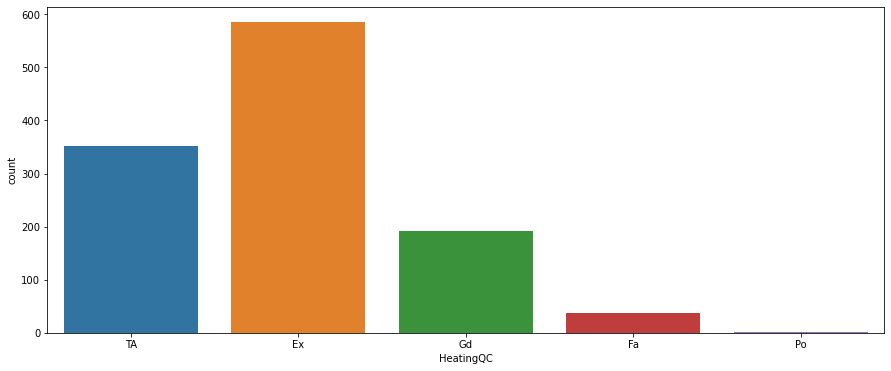

Value counts:

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


Percentage of data: 

Ex    50.0
TA    30.0
Gd    16.0
Fa     3.0
Po     0.0
Name: HeatingQC, dtype: float64 2


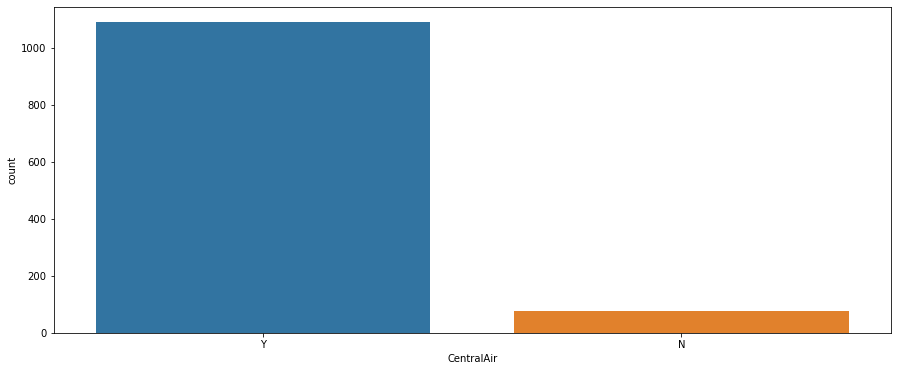

Value counts:

Y    1090
N      78
Name: CentralAir, dtype: int64


Percentage of data: 

Y    93.0
N     7.0
Name: CentralAir, dtype: float64 2


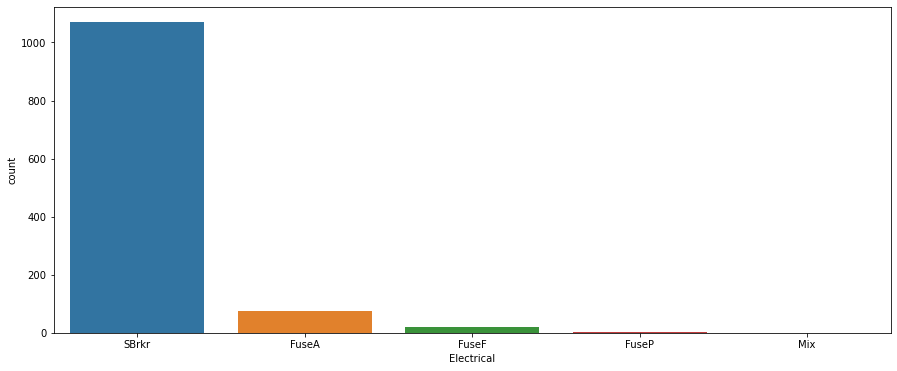

Value counts:

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


Percentage of data: 

SBrkr    92.0
FuseA     6.0
FuseF     2.0
FuseP     0.0
Mix       0.0
Name: Electrical, dtype: float64 2


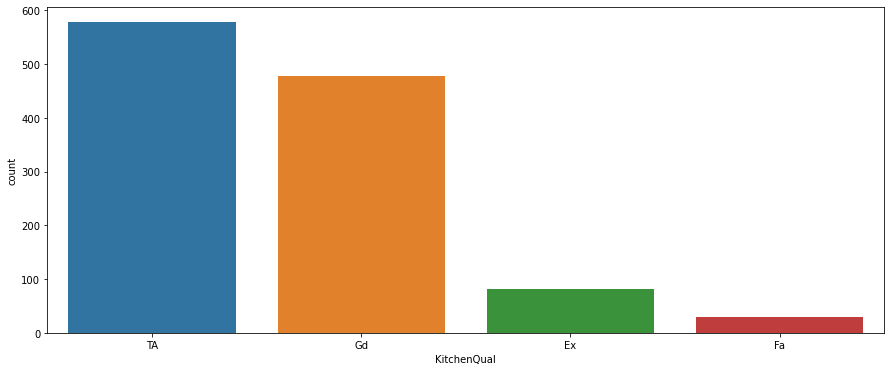

Value counts:

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


Percentage of data: 

TA    49.0
Gd    41.0
Ex     7.0
Fa     3.0
Name: KitchenQual, dtype: float64 2


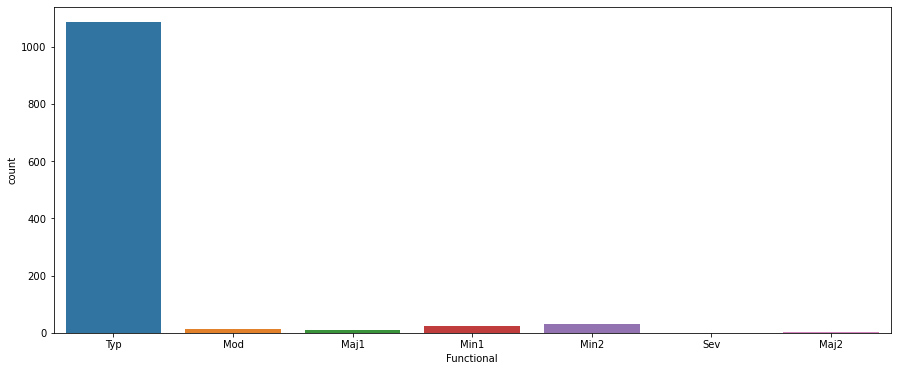

Value counts:

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


Percentage of data: 

Typ     93.0
Min2     3.0
Min1     2.0
Mod      1.0
Maj1     1.0
Maj2     0.0
Sev      0.0
Name: Functional, dtype: float64 2


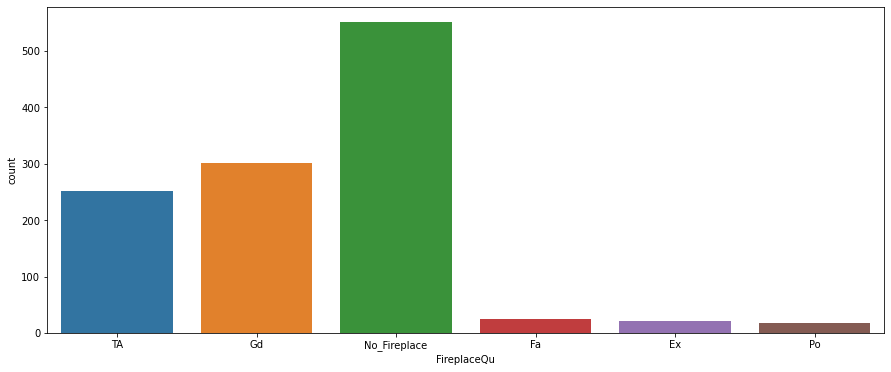

Value counts:

No_Fireplace    551
Gd              301
TA              252
Fa               25
Ex               21
Po               18
Name: FireplaceQu, dtype: int64


Percentage of data: 

No_Fireplace    47.0
Gd              26.0
TA              22.0
Fa               2.0
Ex               2.0
Po               2.0
Name: FireplaceQu, dtype: float64 2


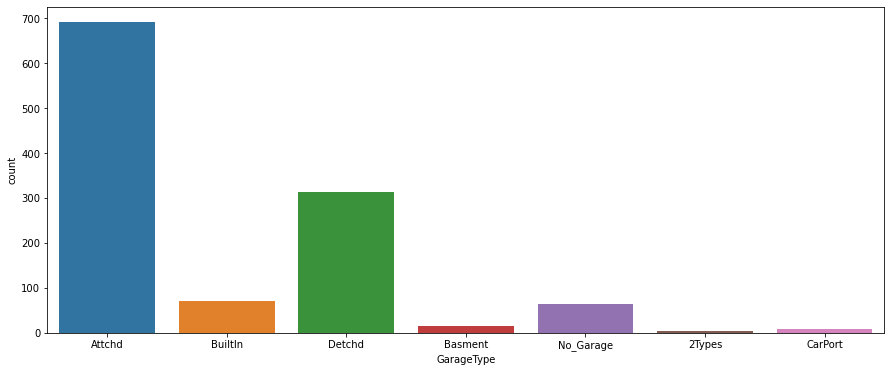

Value counts:

Attchd       691
Detchd       314
BuiltIn       70
No_Garage     64
Basment       16
CarPort        8
2Types         5
Name: GarageType, dtype: int64


Percentage of data: 

Attchd       59.0
Detchd       27.0
BuiltIn       6.0
No_Garage     5.0
Basment       1.0
CarPort       1.0
2Types        0.0
Name: GarageType, dtype: float64 2


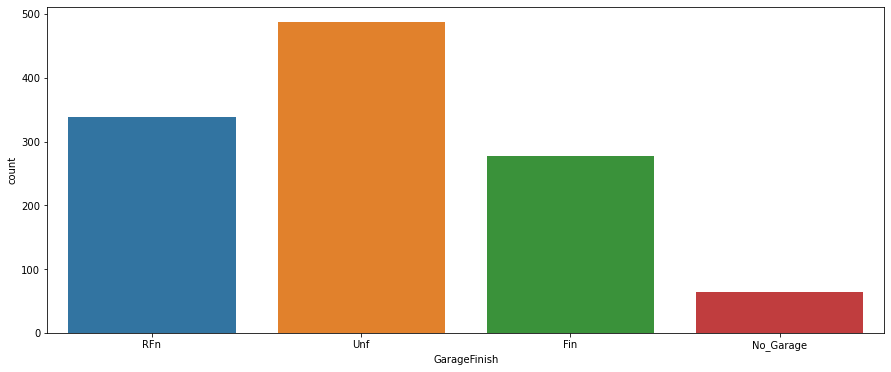

Value counts:

Unf          487
RFn          339
Fin          278
No_Garage     64
Name: GarageFinish, dtype: int64


Percentage of data: 

Unf          42.0
RFn          29.0
Fin          24.0
No_Garage     5.0
Name: GarageFinish, dtype: float64 2


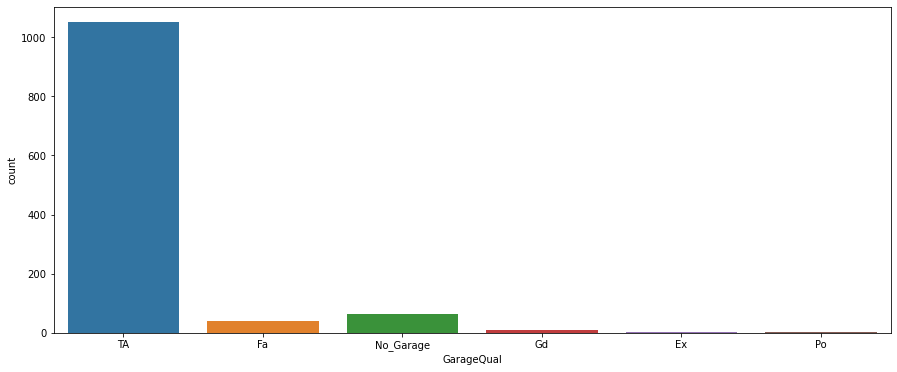

Value counts:

TA           1050
No_Garage      64
Fa             39
Gd             11
Ex              2
Po              2
Name: GarageQual, dtype: int64


Percentage of data: 

TA           90.0
No_Garage     5.0
Fa            3.0
Gd            1.0
Ex            0.0
Po            0.0
Name: GarageQual, dtype: float64 2


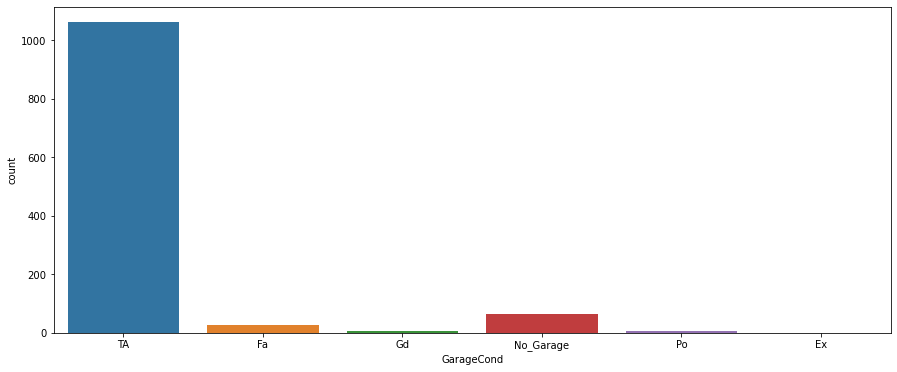

Value counts:

TA           1061
No_Garage      64
Fa             28
Gd              8
Po              6
Ex              1
Name: GarageCond, dtype: int64


Percentage of data: 

TA           91.0
No_Garage     5.0
Fa            2.0
Gd            1.0
Po            1.0
Ex            0.0
Name: GarageCond, dtype: float64 2


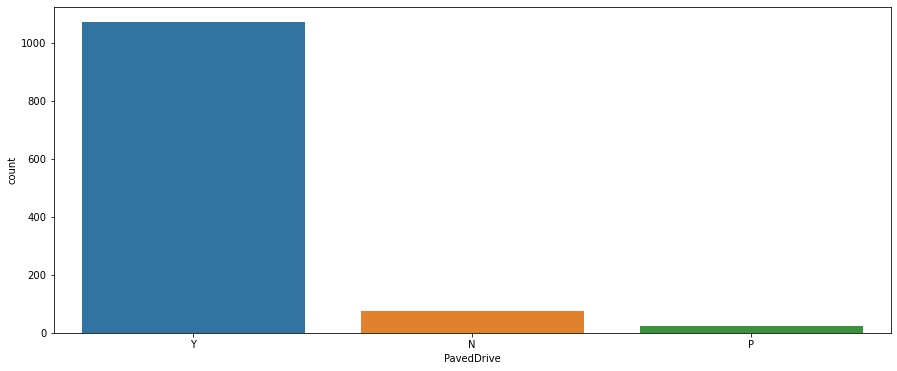

Value counts:

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


Percentage of data: 

Y    92.0
N     6.0
P     2.0
Name: PavedDrive, dtype: float64 2


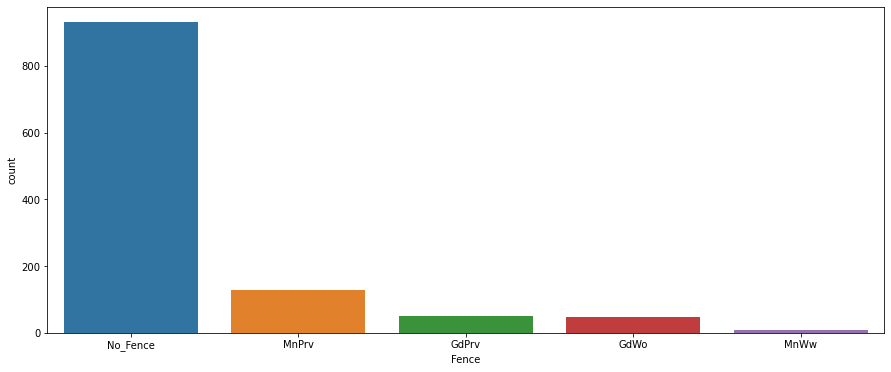

Value counts:

No_Fence    931
MnPrv       129
GdPrv        51
GdWo         47
MnWw         10
Name: Fence, dtype: int64


Percentage of data: 

No_Fence    80.0
MnPrv       11.0
GdPrv        4.0
GdWo         4.0
MnWw         1.0
Name: Fence, dtype: float64 2


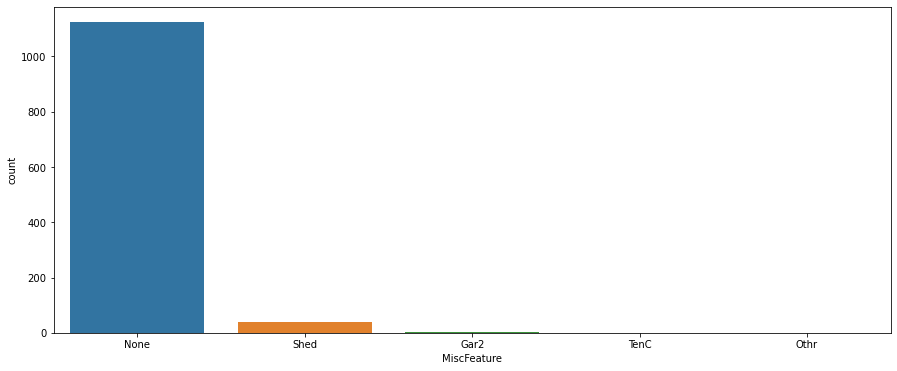

Value counts:

None    1124
Shed      40
Gar2       2
TenC       1
Othr       1
Name: MiscFeature, dtype: int64


Percentage of data: 

None    96.0
Shed     3.0
Gar2     0.0
TenC     0.0
Othr     0.0
Name: MiscFeature, dtype: float64 2


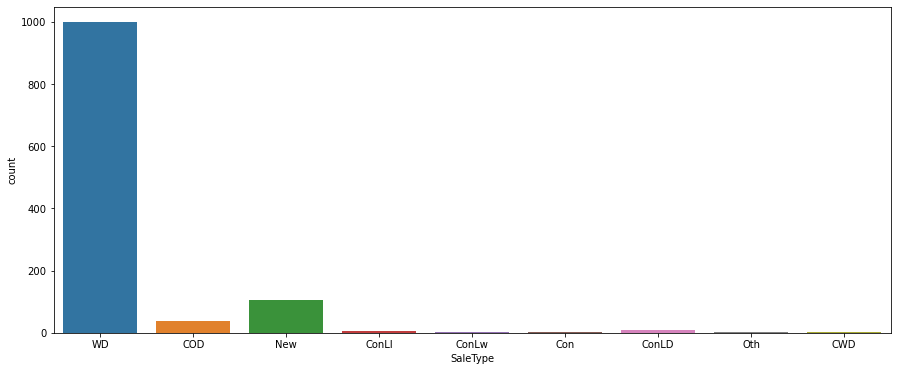

Value counts:

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64


Percentage of data: 

WD       86.0
New       9.0
COD       3.0
ConLD     1.0
ConLI     0.0
ConLw     0.0
Oth       0.0
CWD       0.0
Con       0.0
Name: SaleType, dtype: float64 2


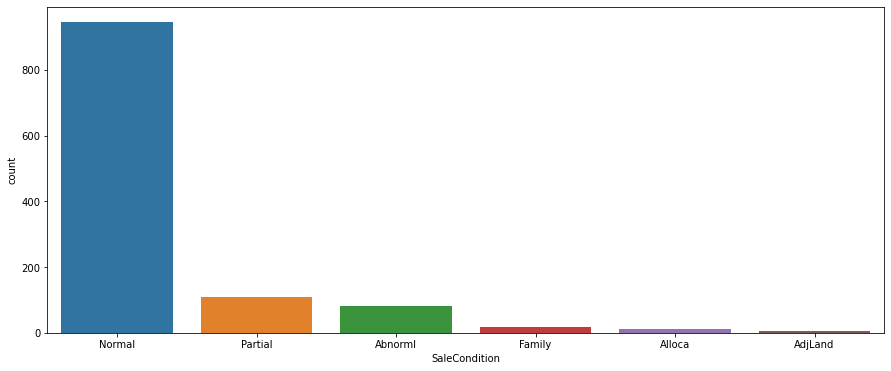

Value counts:

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


Percentage of data: 

Normal     81.0
Partial     9.0
Abnorml     7.0
Family      2.0
Alloca      1.0
AdjLand     0.0
Name: SaleCondition, dtype: float64 2


In [15]:
#Plotting countplot for each categorical data
for i in categorical:
    plt.figure(figsize=(15,6))
    sns.countplot(df_train[i])
    plt.show()
    
#Checking value counts and percentage of data classification in each string attribute
    print("Value counts:\n")
    print(df_train[i].value_counts())
    print('\n')
    print("Percentage of data: \n")
    print(round(df_train[i].value_counts()/1168*100),2)  #1168 is the entire data

### Observations:

-> By looking at countplot of MSZoning ,which Identifies the general zoning classification of the sale,we find that 79 % of houses were sold in Low density resedential Areas.


-> For street ,which states:Type of road access to property,we observe that almost 100% of house which were sold had access to paved roads so we can consider that no houses were purchased which had gravel road access.

-> For Alley,93% of the purchased house do not have access to alley.Only 4% have gravel & 3% have paved alley.

-> LotShape : 63% of the sold property was of Regular shape followed by slightly irregular type (33%).It means Australian gives priority to regular shaped houses.

-> LandContour :90% of sold houses were neary flat level.

-> LotConfig : 72% of purchased houses had Inside lot of the property.

-> LandSlope :Around 95% of the sold property had gentle slope

-> Neighborhood: Physical locations within Ames city limits-:highest 16% of purhcased houses has neighbourhood of NWAmes(Northwest Ames) followed by CollgCr(College Creek) and least houses were purchased in neighbour hood of Bluestem

-> Condition1: Proximity to various conditions-:86% of purchased houses had normal proximity to various conditions1 and least 0.00 had RRne,RRNn proximity

-> Condition2: Proximity to various conditions (if more than one is present)-:99% of purchased houses had normal proximity to various conditions2

-> BldgType: Type of dwelling-:84% purchased houses were single family detached,followed by 8% 2FmCon(Two-family Conversion)

-> HouseStyle: Style of dwelling-:49% houses had 1story followed by 2story style (31%)

-> RoofStyle: Type of roof-:78% of houses have Gable roof style and 19% have Hip roof style

-> RoofMatl: Roof material-:98% houses have CompShg(Standard (Composite) Shingle) roof material

-> Exterior1st: Exterior covering on house-:34% houses have Vinylsiding covering on exteriors 15% have hard board and metal siding

-> Exterior2nd: Exterior covering on house (if more than one material)-:33% houses have VinylSd(Vinyl Siding) 15% have hard board and metal siding

-> MasVnrType: Masonry veneer type-:60% of houses have no masonry veneer type followed by BrkFace(Brick Face) (30%)

-> ExterQual: Evaluates the quality of the material on the exterior-:61% of the sold hoUse have TA(Average/Typical) quality material on exterior followed by Gd(Good) 34%

-> ExterCond: Evaluates the present condition of the material on the exterior-:88% houses are currently in TA(average) condition of exterior material

-> Foundation: Type of foundation-:44% houses have foundation CBlock(Cinder Block) & 44% have PConc(Poured Contrete)

-> BsmtQual: Evaluates the height of the basement-:44% of houses have TA(typical) (80-89 inches) basement height followed by Gd(Good) (90-99 inches)

-> BsmtCond: Evaluates the general condition of the basement-:89% of houses have TA(Typical - slight dampness allowed) basment

-> BsmtExposure: Refers to walkout or garden level walls-:64% of houses have No(No Exposure) followed by Av(Average Exposure ) 15%

-> BsmtFinType1: Rating of basement finished area-:(30%) have Unf(Unfinshed) basement area and 28% comes under GLQ(good living quarters)

-> Heating: Type of heating-:98% houses have GasA(Gas forced warm air furnace) heating type

-> HeatingQC: Heating quality and condition-:30% houses have average quality heating

-> CentralAir: Central air conditioning-:93% houses are central air

-> Electrical: Electrical system-:92% houses have SbrKr(Standard Circuit Breakers & Romex) type of electrical systems

-> KitchenQual: Kitchen quality-:49% houses have average (TA) kitchen quality

-> Functional: Home functionality (Assume typical unless deductions are warranted)-:92% houses have typical (TA) home functionality

-> FireplaceQu: Fireplace quality-:47% of the houses donot have fireplace,25% houses have Gd(Good - Masonry Fireplace in main level) FireplaceQuality

-> GarageType: Garage location-:57% houses have Attached garage type,while 29% have Detchd(Detached from home)

-> GarageFinish: Interior finish of the garage:42% of houses have unfinished garage while 29% have RFn(Rough Finished)

-> GarageQual: Garage quality-:90% of houses have average garage quality

-> GarageCond: Garage condition-:91% of houses have TA( average garage condition)

-> PavedDrive: Paved driveway-:92% of houses have Y( paved drive) way

-> Fence: Fence quality-:89% houses have NA(no fence).

-> MiscFeature: Miscellaneous feature-:96% houses have no miscellaneous features

-> SaleType: Type of sale-:85% houses have sale type WD(warranty deed -conventional)

-> SaleCondition:81% of houses are in normal sale condition

In [16]:
#Taking all continuous data and analyzing it
cont=[x for x in df_train.columns if x not in categorical]

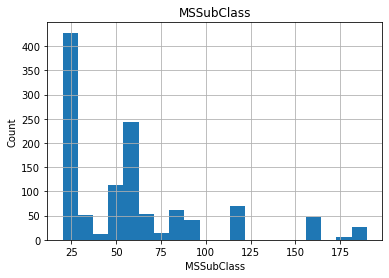

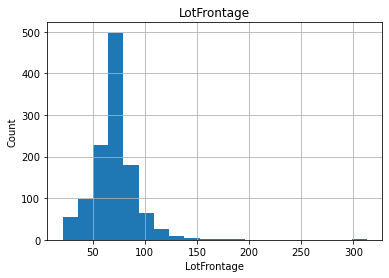

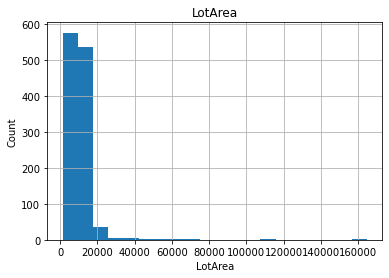

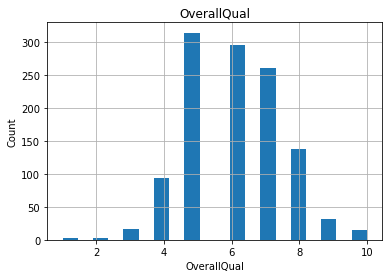

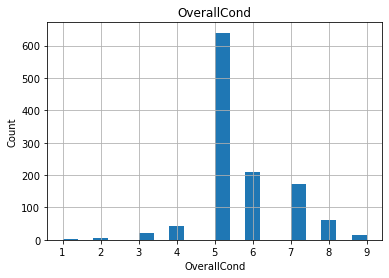

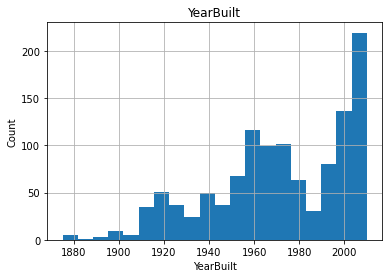

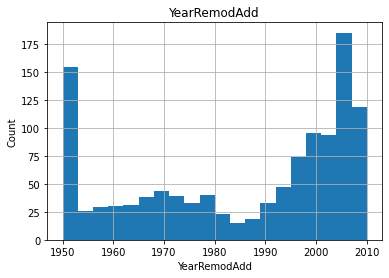

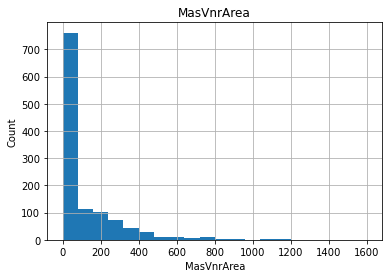

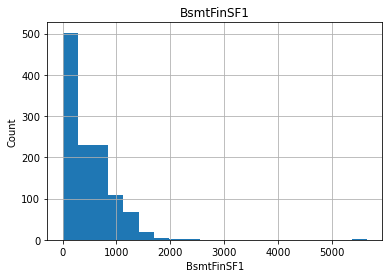

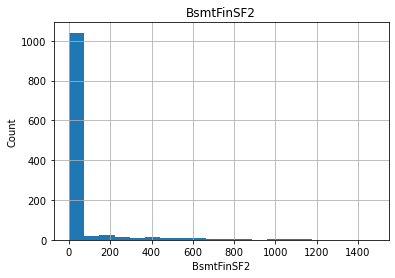

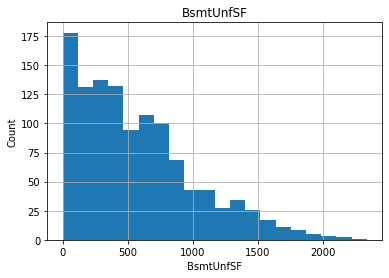

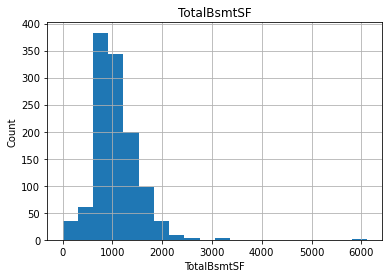

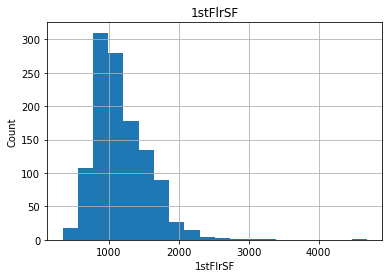

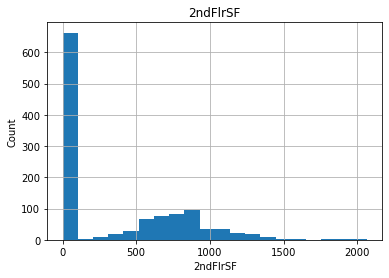

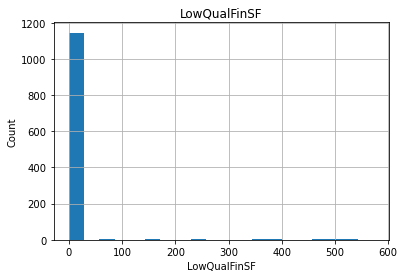

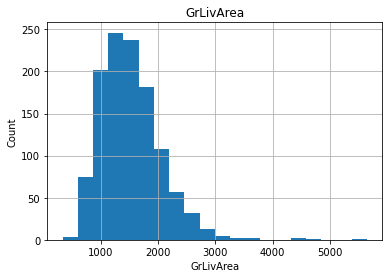

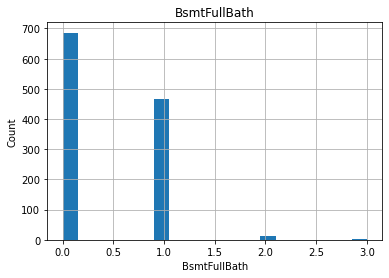

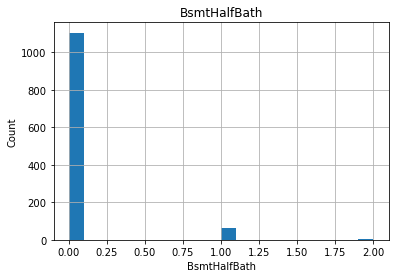

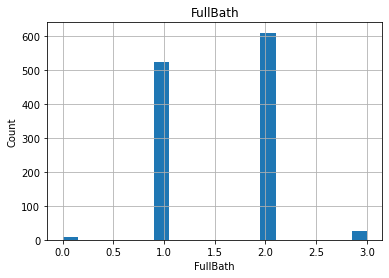

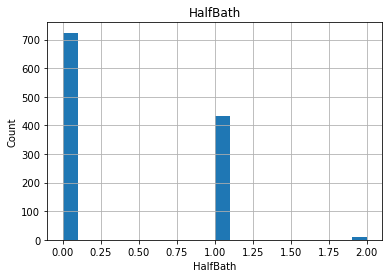

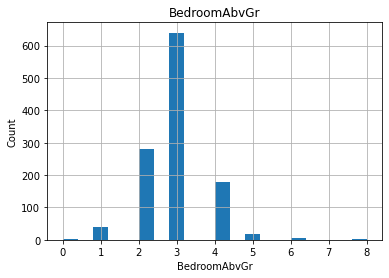

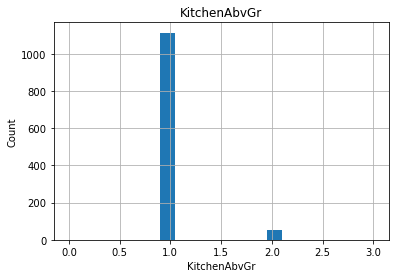

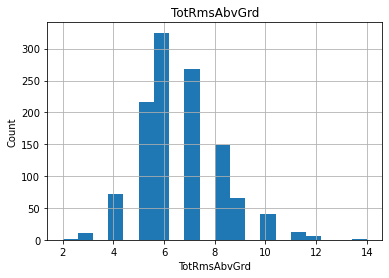

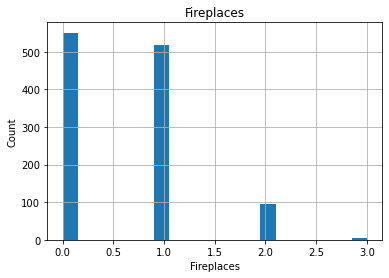

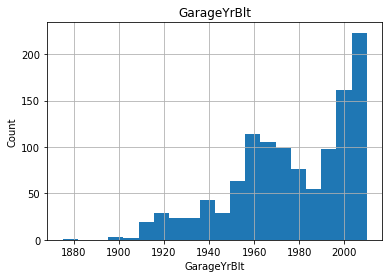

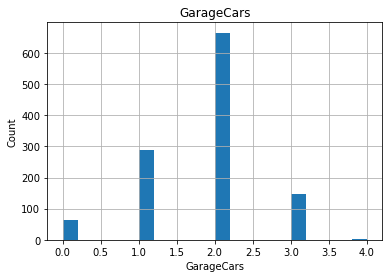

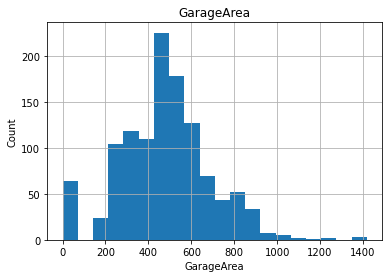

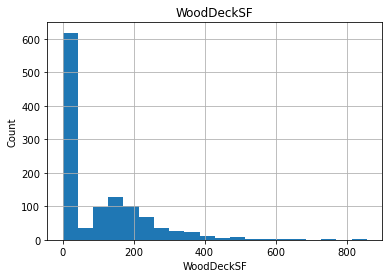

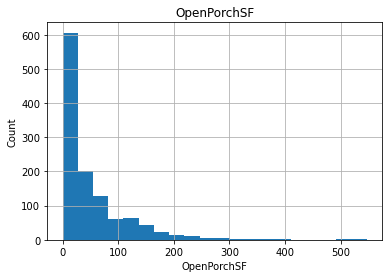

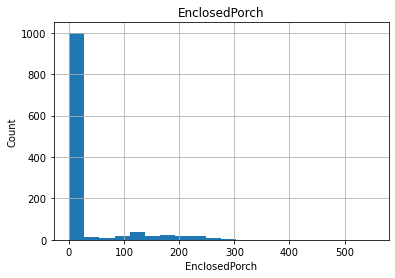

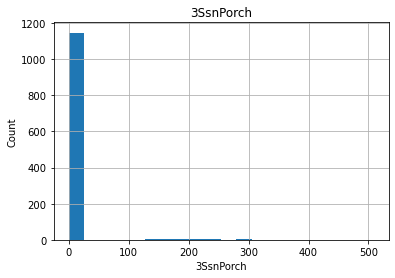

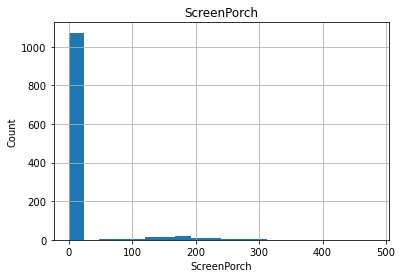

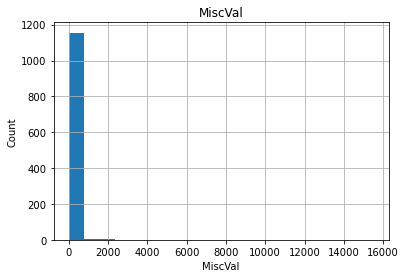

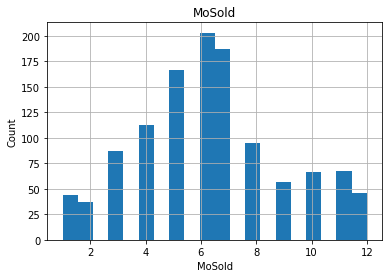

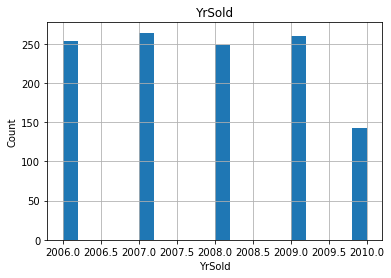

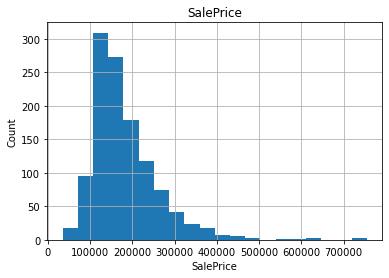

In [17]:
#visualizing each continuous features using histogram
for i in cont:
    data=df_train.copy()
    data[i].hist(bins=20)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

### Observations:

-> lotFrontage:Almost all houses have LotFrontage between 20 to 150

-> lotArea:Around 580 house have lot Area between (0-10000)sqft.Very few houses have lot area aound 120000sqft & around 160000sqft

-> OverallQual: Rates the overall material and finish of the house-:Around 300 houses sold were in average condition.Only 10-15 houses were in excellent condition.

-> YearBuilt: Original construction date-:More number of people have brought the houses build after 1990

-> MasVnrArea: Masonry veneer area in square feet-:50% of houses have Masonry veneer area as '0-50' and out of rest 50% houses most houses have Masonry veneer area 50-1200

-> BsmtFinSF1: Type 1 finished square feet-:MOst houses have Type 1 finished square feet area of basement between 0 and 1500

-> BsmtFinSF2: Type 2 finished square feet-:Around 1000 houses have Type 2 finished square feet area of 0

-> BsmtUnfSF: Unfinished square feet of basement area-:Around 130 houses have unfinished basesent of area around 100-500 sqft

-> 1stFlrSF: First Floor square feet-:Around 280 houses have 1st floor square feet area between 800-1200sqft

-> GrLivArea: Above grade (ground) living area square feet-:Most houses have above ground living sq ft area in between 800 to 3000

-> BsmtFullBath: Basement full bathrooms-:50% houses have no full bathrooms in basement and in remaining houses most have 1 full bathrooms in basement and very few has 2 full bathrooms

-> FullBath: Full bathrooms above grade-:25% houses have 1 full bathrooms above ground and 50% have 2 full bathrooms located above ground and very less have 3

-> HalfBath: Half baths above grade-: around 700 houses have no half bathrooms very few has 1 half bathroom

-> Bedroom: Bedrooms above grade (does NOT include basement bedrooms)-:Most houses have 3 bedrooms above ground followed by 2 and 4

-> Kitchen: Kitchens above grade-:Maximum houses have 1 Kitchen .very few have 2

-> TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)-:Around 300 houses have 6 rooms ,around 200 have 5,&250 have 7. Very few have 12 & 14 rooms

-> Fireplaces: Number of fireplaces-:Most houses have 0 fireplaces followed by 1

-> GarageCars: Size of garage in car capacity-:Most houses have garage with 2 car capcity

-> GarageArea: Size of garage in square feet-:Most houses have Garage area in between 200 to 800

-> woodDeckSF: Wood deck area in square feet-:More than 50% of houses have 0 Wood Deck sq ft area and rest have in between 0 to 400

-> OpenPorchSF: Open porch area in square feet-:25% of houses have 0 open porch sq ft area and rest have in between 0 to 300

-> EnclosedPorch: Enclosed porch area in square feet-:Almost all houses have 0 enclosed porch sq ft area

-> ScreenPorch: Screen porch area in square feet-:Almost all houses have 0 screen porch area sq ft

-> Sale Price-:Around 500 house have sale price in between 100000 to 200000.Very few houses have sale price of 600000 & 700000

# Bivariate Analysis

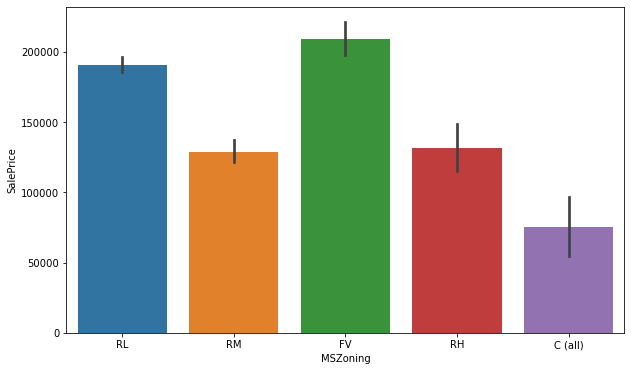

MSZoning
C (all)     75208.888889
FV         209478.461538
RH         131558.375000
RL         191004.181034
RM         129070.975460
Name: SalePrice, dtype: float64


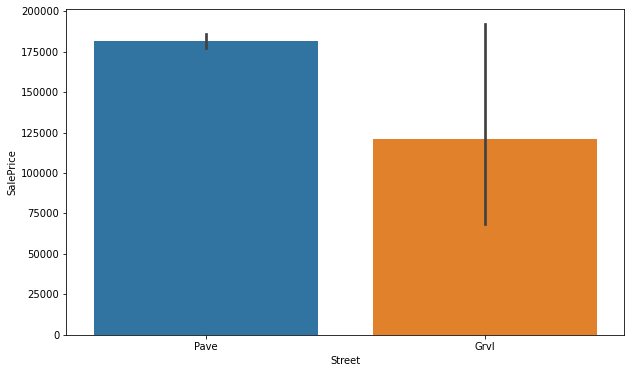

Street
Grvl    121110.750000
Pave    181684.450172
Name: SalePrice, dtype: float64


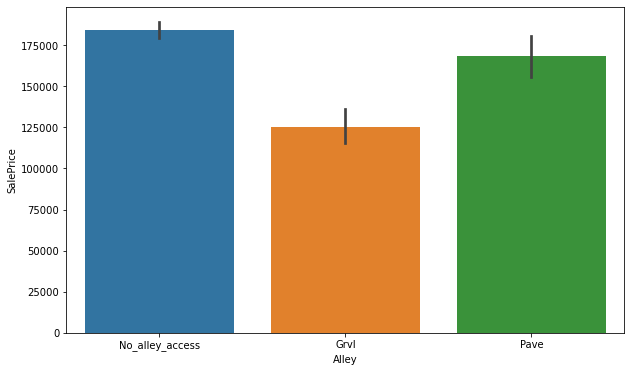

Alley
Grvl               125511.073171
No_alley_access    184016.191567
Pave               168264.555556
Name: SalePrice, dtype: float64


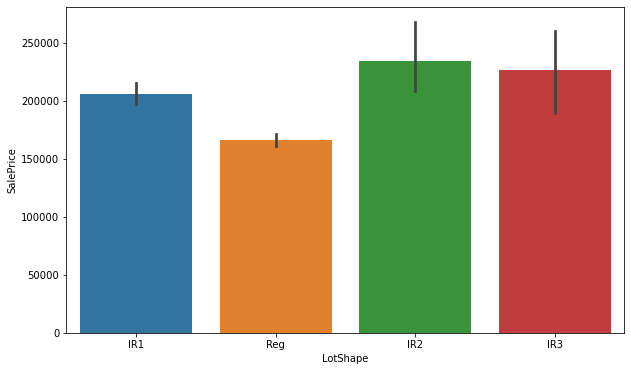

LotShape
IR1    206038.464103
IR2    233827.750000
IR3    226120.833333
Reg    165906.660811
Name: SalePrice, dtype: float64


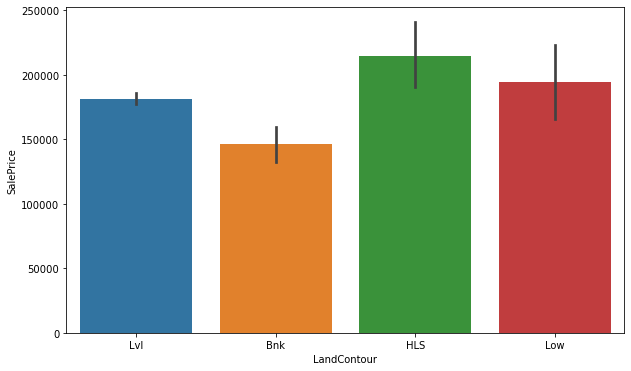

LandContour
Bnk    146163.140000
HLS    214302.166667
Low    194393.333333
Lvl    181476.572658
Name: SalePrice, dtype: float64


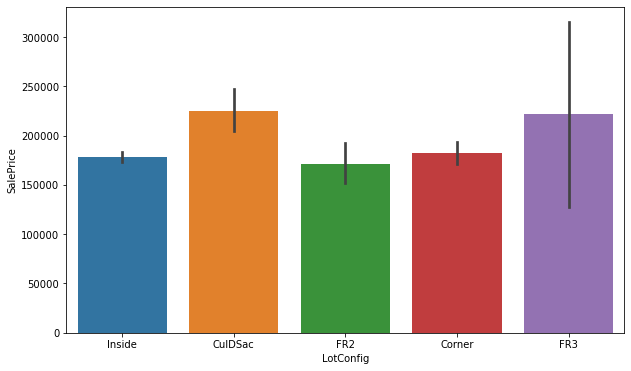

LotConfig
Corner     182427.635135
CulDSac    224594.463768
FR2        171138.636364
FR3        221500.000000
Inside     178003.105701
Name: SalePrice, dtype: float64


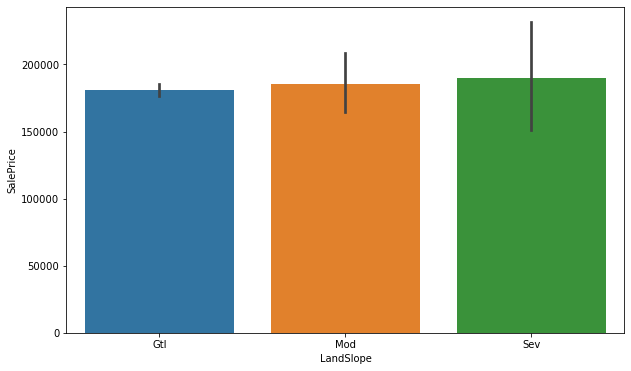

LandSlope
Gtl    181203.795475
Mod    185353.313725
Sev    190160.833333
Name: SalePrice, dtype: float64


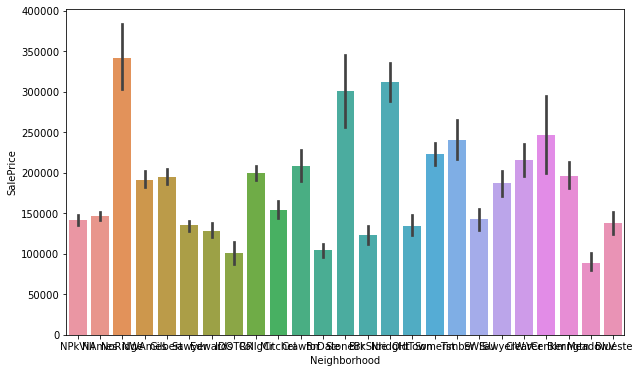

Neighborhood
Blmngtn    195987.000000
Blueste    137500.000000
BrDale     104081.818182
BrkSide    122836.000000
ClearCr    216120.833333
CollgCr    199517.508475
Crawfor    208474.688889
Edwards    128544.216867
Gilbert    194790.093750
IDOTRR     101322.666667
MeadowV     88444.444444
Mitchel    154654.411765
NAmes      146511.225275
NPkVill    141968.750000
NWAmes     191643.305085
NoRidge    341260.228571
NridgHt    312548.655738
OldTown    133947.197674
SWISU      142587.333333
Sawyer     135029.866667
SawyerW    186909.647059
Somerst    222649.588235
StoneBr    301145.736842
Timber     240579.291667
Veenker    246833.333333
Name: SalePrice, dtype: float64


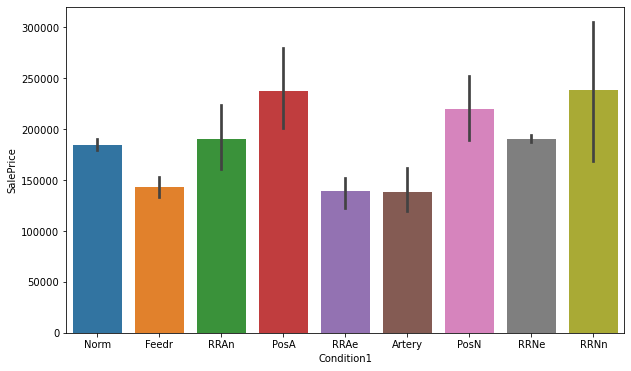

Condition1
Artery    137926.315789
Feedr     142799.731343
Norm      184692.003980
PosA      237833.333333
PosN      219264.705882
RRAe      139044.444444
RRAn      190074.850000
RRNe      190750.000000
RRNn      238000.000000
Name: SalePrice, dtype: float64


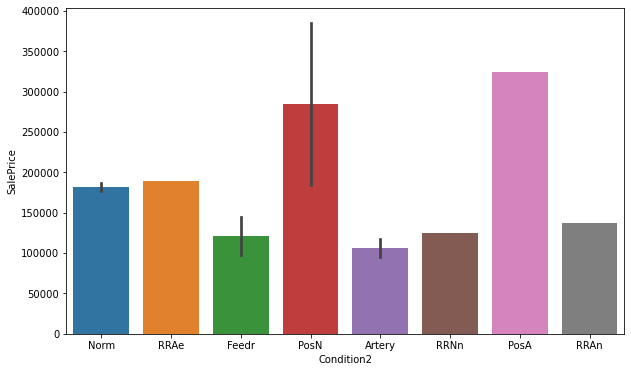

Condition2
Artery    106500.000000
Feedr     121166.666667
Norm      181697.129983
PosA      325000.000000
PosN      284875.000000
RRAe      190000.000000
RRAn      136905.000000
RRNn      125000.000000
Name: SalePrice, dtype: float64


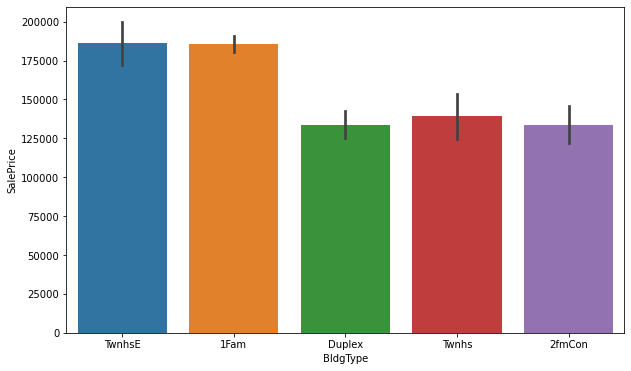

BldgType
1Fam      185602.300714
2fmCon    133737.037037
Duplex    133871.609756
Twnhs     139437.931034
TwnhsE    186066.111111
Name: SalePrice, dtype: float64


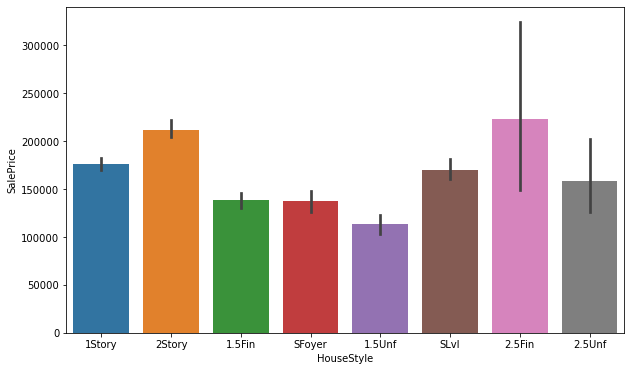

HouseStyle
1.5Fin    138546.363636
1.5Unf    113216.666667
1Story    175940.826990
2.5Fin    223285.714286
2.5Unf    158690.000000
2Story    212193.515235
SFoyer    137508.000000
SLvl      170140.851064
Name: SalePrice, dtype: float64


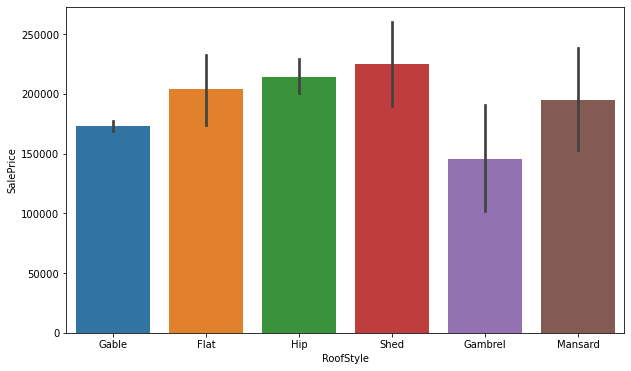

RoofStyle
Flat       204080.833333
Gable      173251.570492
Gambrel    145111.111111
Hip        214493.364444
Mansard    194795.800000
Shed       225000.000000
Name: SalePrice, dtype: float64


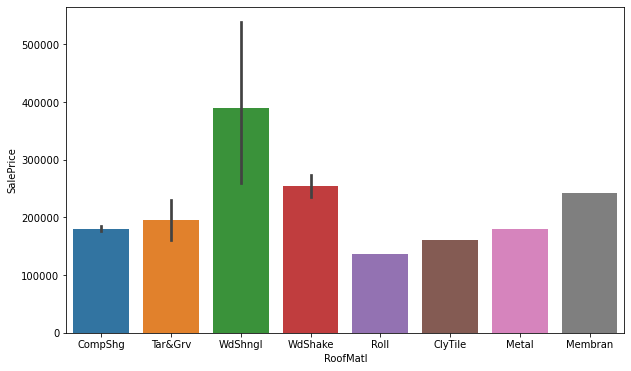

RoofMatl
ClyTile    160000.000000
CompShg    180009.329545
Membran    241500.000000
Metal      180000.000000
Roll       137000.000000
Tar&Grv    195747.000000
WdShake    254250.000000
WdShngl    390250.000000
Name: SalePrice, dtype: float64


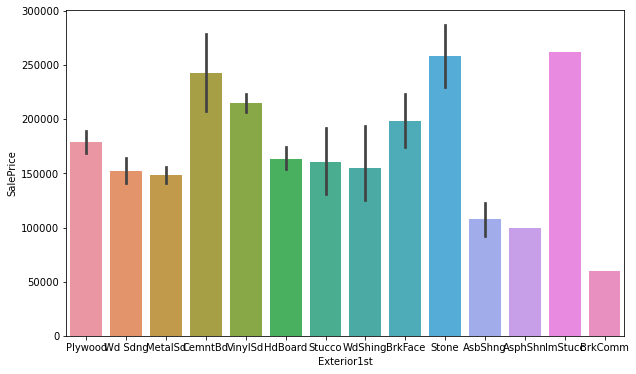

Exterior1st
AsbShng    107774.263158
AsphShn    100000.000000
BrkComm     60000.000000
BrkFace    198391.463415
CemntBd    242928.476190
HdBoard    163432.648045
ImStucc    262000.000000
MetalSd    148498.196629
Plywood    178890.075269
Stone      258500.000000
Stucco     160602.272727
VinylSd    215359.676768
Wd Sdng    152572.724138
WdShing    155481.578947
Name: SalePrice, dtype: float64


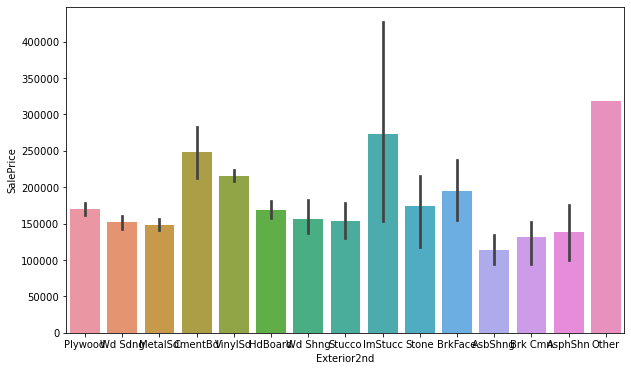

Exterior2nd
AsbShng    114372.833333
AsphShn    138000.000000
Brk Cmn    131300.000000
BrkFace    194772.500000
CmentBd    247940.380952
HdBoard    168398.200000
ImStucc    273712.500000
MetalSd    148570.398844
Other      319000.000000
Plywood    169979.042373
Stone      174406.000000
Stucco     153066.695652
VinylSd    215607.100775
Wd Sdng    152218.969697
Wd Shng    156650.000000
Name: SalePrice, dtype: float64


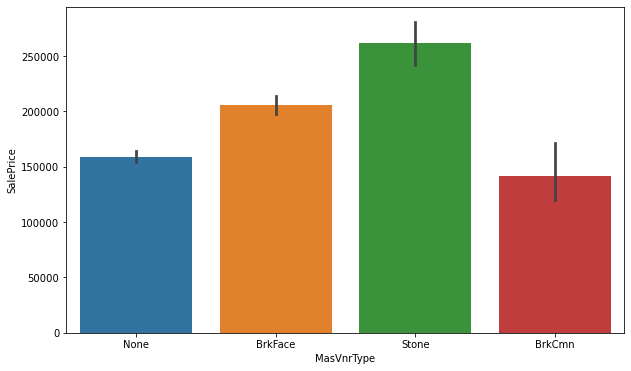

MasVnrType
BrkCmn     141990.076923
BrkFace    205275.432203
None       159079.399716
Stone      261417.867347
Name: SalePrice, dtype: float64


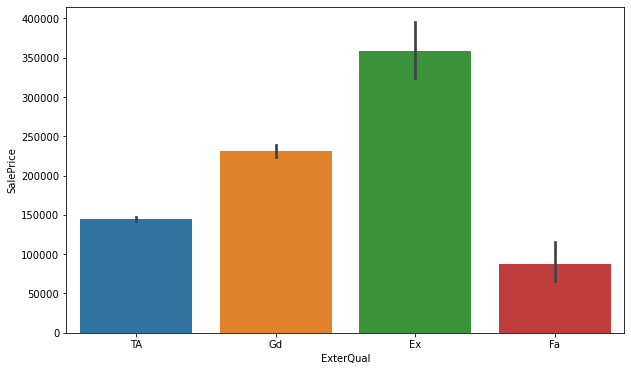

ExterQual
Ex    357817.651163
Fa     87435.727273
Gd    231009.743073
TA    144918.163180
Name: SalePrice, dtype: float64


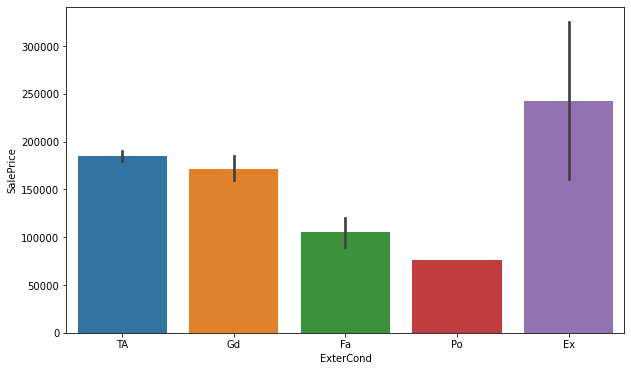

ExterCond
Ex    243000.000000
Fa    105294.769231
Gd    171391.837607
Po     76500.000000
TA    184551.990215
Name: SalePrice, dtype: float64


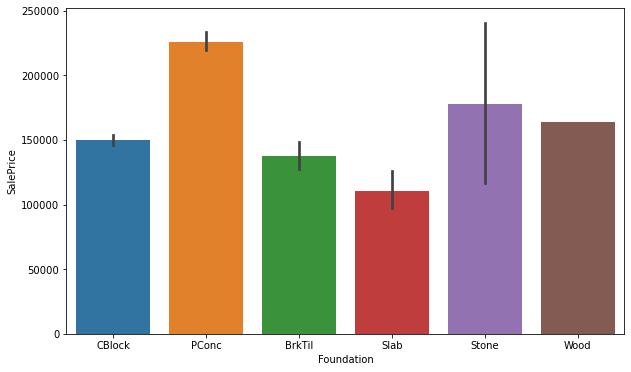

Foundation
BrkTil    137895.285714
CBlock    149858.994186
PConc     225757.504873
Slab      110846.428571
Stone     177651.000000
Wood      164000.000000
Name: SalePrice, dtype: float64


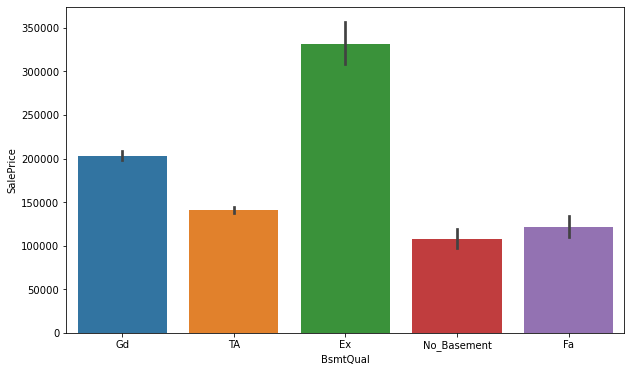

BsmtQual
Ex             331469.978723
Fa             121349.000000
Gd             203225.445783
No_Basement    107897.500000
TA             140898.736944
Name: SalePrice, dtype: float64


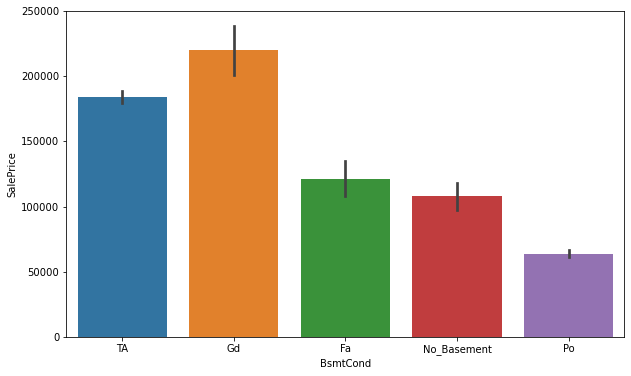

BsmtCond
Fa             121075.102564
Gd             219908.107143
No_Basement    107897.500000
Po              64000.000000
TA             184018.669549
Name: SalePrice, dtype: float64


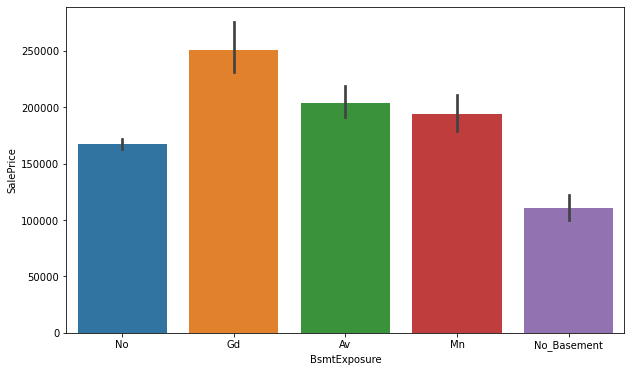

BsmtExposure
Av             204174.861111
Gd             250581.138889
Mn             194213.838710
No             167539.144180
No_Basement    110626.612903
Name: SalePrice, dtype: float64


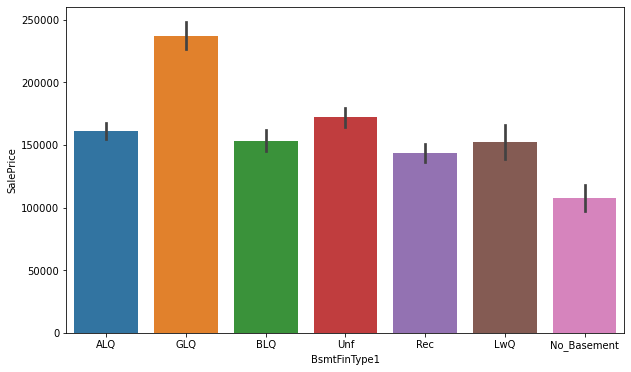

BsmtFinType1
ALQ            161003.879310
BLQ            152803.396694
GLQ            236871.596970
LwQ            152712.711864
No_Basement    107897.500000
Rec            143592.844037
Unf            172159.521739
Name: SalePrice, dtype: float64


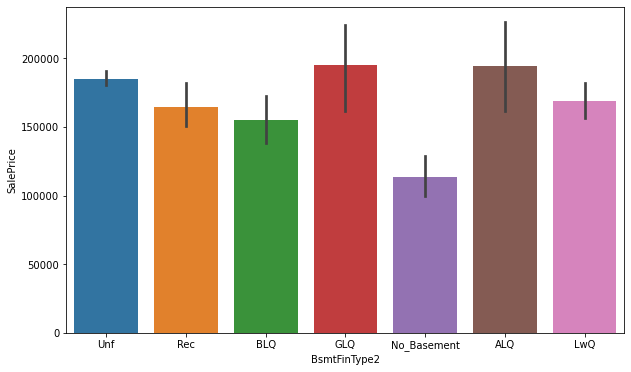

BsmtFinType2
ALQ            194712.500000
BLQ            154815.958333
GLQ            194937.500000
LwQ            168846.250000
No_Basement    113578.225806
Rec            164477.325581
Unf            185077.455090
Name: SalePrice, dtype: float64


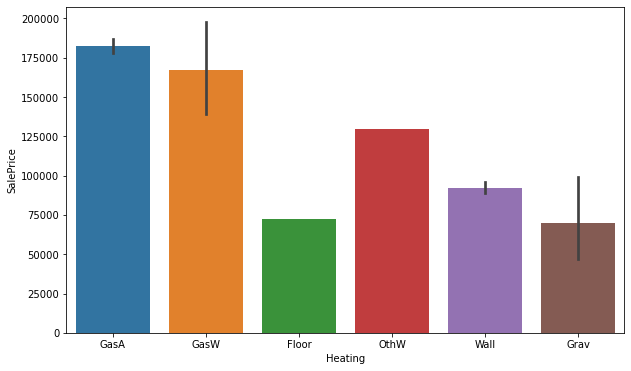

Heating
Floor     72500.000000
GasA     182591.394576
GasW     167312.785714
Grav      70080.000000
OthW     129500.000000
Wall      92100.000000
Name: SalePrice, dtype: float64


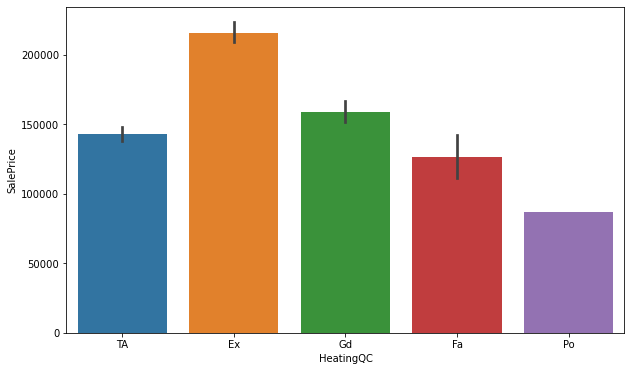

HeatingQC
Ex    215954.223932
Fa    126556.710526
Gd    158909.833333
Po     87000.000000
TA    142684.883523
Name: SalePrice, dtype: float64


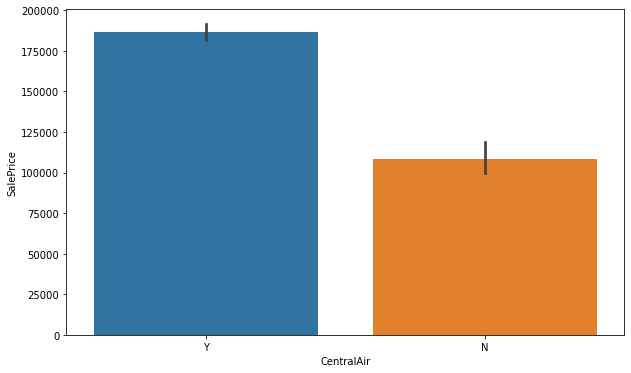

CentralAir
N    108539.576923
Y    186696.381651
Name: SalePrice, dtype: float64


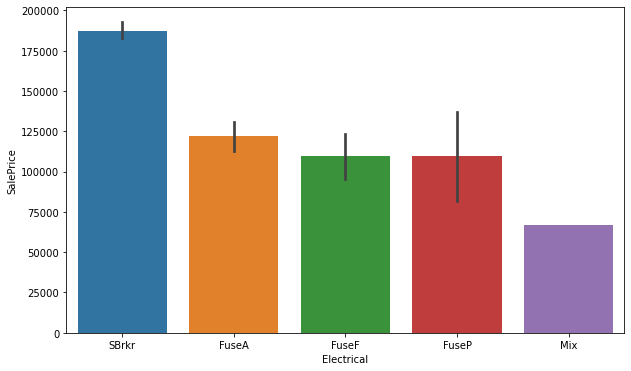

Electrical
FuseA    121840.986486
FuseF    109611.285714
FuseP    109500.000000
Mix       67000.000000
SBrkr    187253.339252
Name: SalePrice, dtype: float64


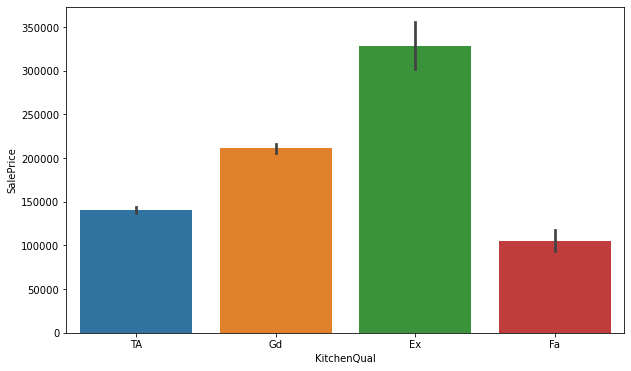

KitchenQual
Ex    327812.329268
Fa    105028.100000
Gd    211076.234310
TA    140206.313149
Name: SalePrice, dtype: float64


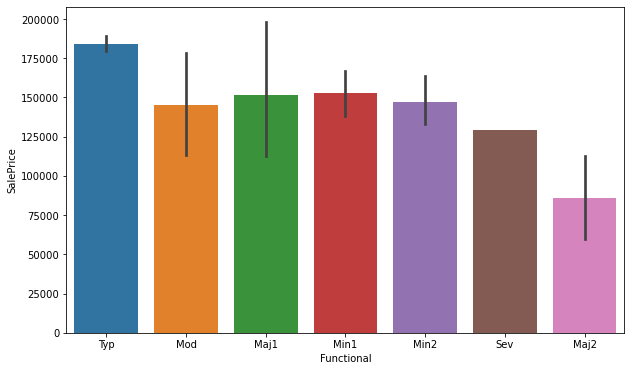

Functional
Maj1    151443.090909
Maj2     86000.000000
Min1    152630.000000
Min2    146841.666667
Mod     145241.666667
Sev     129000.000000
Typ     184204.948387
Name: SalePrice, dtype: float64


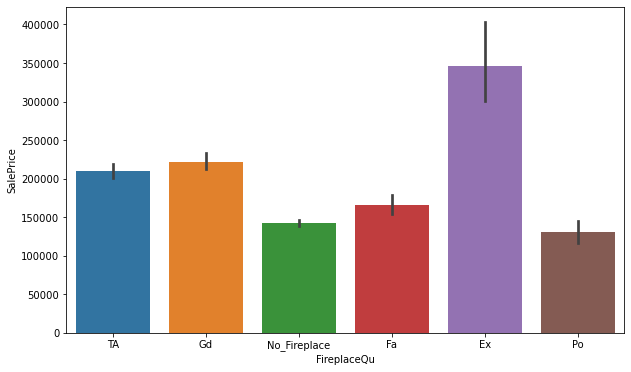

FireplaceQu
Ex              346091.142857
Fa              166214.000000
Gd              221925.581395
No_Fireplace    142411.822142
Po              131487.944444
TA              209946.753968
Name: SalePrice, dtype: float64


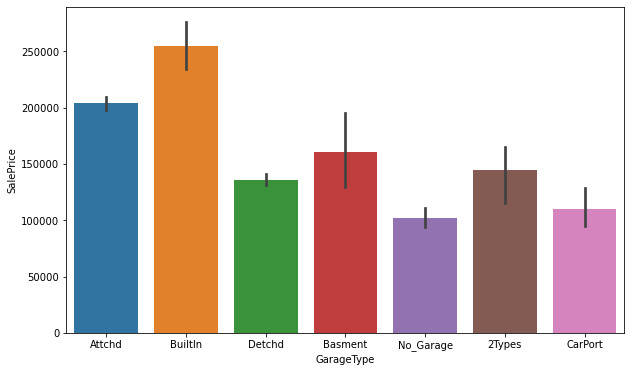

GarageType
2Types       144200.000000
Attchd       203675.839363
Basment      160708.937500
BuiltIn      254970.900000
CarPort      109957.375000
Detchd       135873.799363
No_Garage    102200.000000
Name: SalePrice, dtype: float64


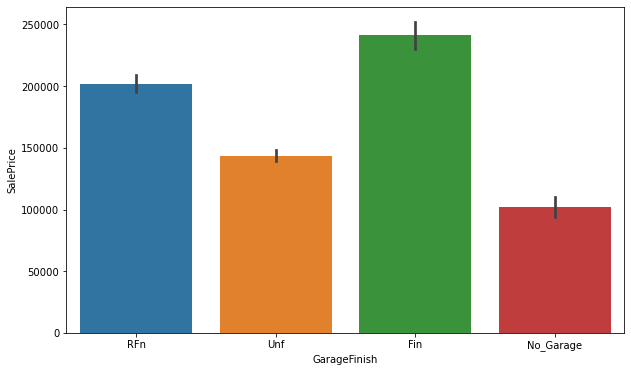

GarageFinish
Fin          241223.809353
No_Garage    102200.000000
RFn          201925.554572
Unf          143555.156057
Name: SalePrice, dtype: float64


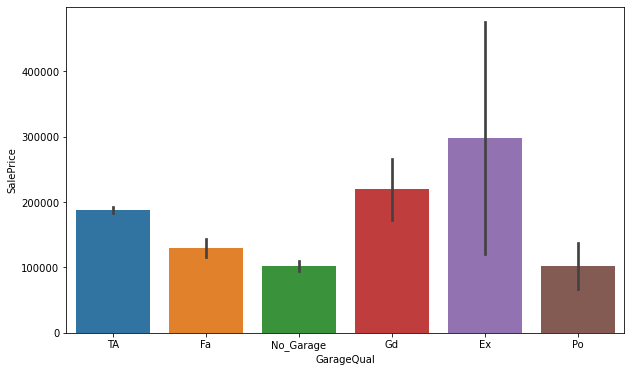

GarageQual
Ex           297750.000000
Fa           129889.000000
Gd           219822.727273
No_Garage    102200.000000
Po           102000.000000
TA           187753.449524
Name: SalePrice, dtype: float64


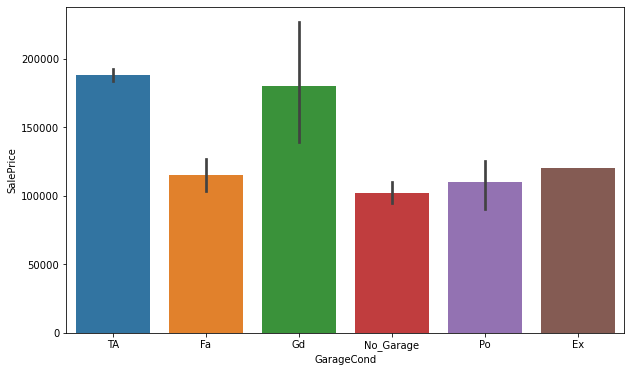

GarageCond
Ex           120500.000000
Fa           115031.821429
Gd           179921.250000
No_Garage    102200.000000
Po           110500.000000
TA           188483.112158
Name: SalePrice, dtype: float64


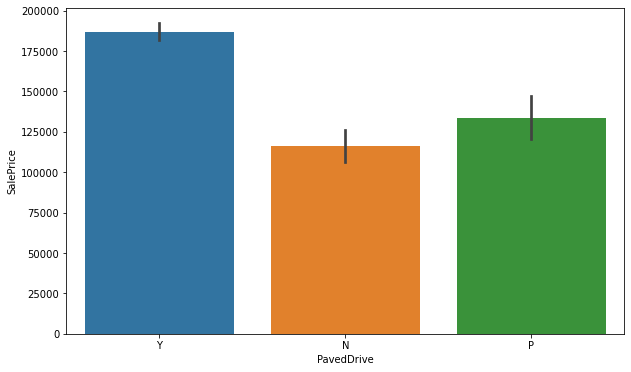

PavedDrive
N    116421.472973
P    133326.086957
Y    187006.026144
Name: SalePrice, dtype: float64


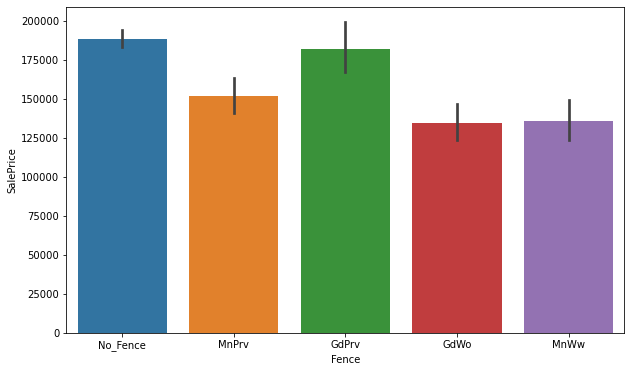

Fence
GdPrv       181743.529412
GdWo        134593.255319
MnPrv       151392.798450
MnWw        135715.000000
No_Fence    188489.279270
Name: SalePrice, dtype: float64


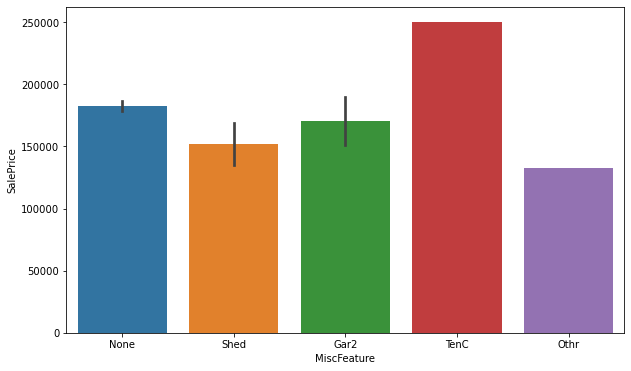

MiscFeature
Gar2    170750.000000
None    182541.548043
Othr    133000.000000
Shed    151598.575000
TenC    250000.000000
Name: SalePrice, dtype: float64


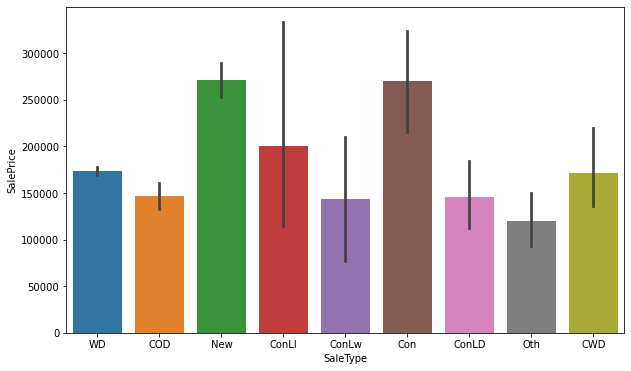

SaleType
COD      146722.368421
CWD      171166.666667
Con      269600.000000
ConLD    146141.000000
ConLI    200390.000000
ConLw    143625.000000
New      271104.500000
Oth      119850.000000
WD       173668.456456
Name: SalePrice, dtype: float64


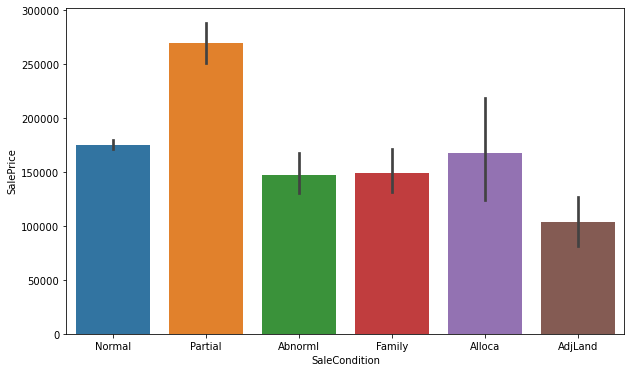

SaleCondition
Abnorml    147567.938272
AdjLand    104125.000000
Alloca     167377.416667
Family     149138.888889
Normal     175436.408466
Partial    269585.231481
Name: SalePrice, dtype: float64


In [18]:
#Visualizing each categorical column wrt sale price
for i in categorical:
    plt.figure(figsize=(10,6))
    sns.barplot(x=df_train[i],y=df_train['SalePrice'])
    plt.show()
    print(df_train.groupby(df_train[i])['SalePrice'].mean())  #Calculating mean value of SalePrice

### Observations:

-> MSZoning:The avg sale price of the house is maximum in FV(Floating Village Residential) foloowed by RL(Residential Low Density) zone

-> Street:The property that have access to paved road have much higher average sale price as compared to that with gravel street

-> Alley:houses that do not have access to alley have higher sale price as compared to those with paved or gravel alley

-> LotShape:sale price is not much affected by lotshape,however IR2(Moderately Irregular) have a bit higher price compared to other while Reg(Regular) have lowest avg sale price

-> LandContour:Flatness of the property-:HLS(Hillside - Significant slope from side to side) have maximum average sale price & Bnk(Banked - Quick and significant rise from street grade to building) have miimum average sale price

-> LandSlope: It doesn't affect the average sale price of house

-> Neighborhood:The houses that has a neighbourhood of NoRidge(Northridge) has the maximum sale price followed by that with a neighbourhood of NridgHt(Northridge Heights)

-> Condition1:house that is RRAn(Adjacent to North-South Railroad) has hightest avg sale price followed by PosA(Adjacent to postive off-site feature) while houses that is Artery(Adjacent to arterial street) has a minimum average sale price.

->BldgType: Type of dwelling-:TwnhsE(Townhouse End Unit) & 1Fam(Single-family Detached) type house have hightset selling price.

-> HouseStyle: Style of dwelling-:The average sale price of 2.5Fin(Two and one-half story) is maximum followed by 2Story(Two story). 1.5Unf(One and one-half story: 2nd level unfinished) have lowest avg selling price

-> RoofMatl: Roof material-:House with roof material WdShngl(Wood Shingles) have a very high average selling price,followed by that with roof of WdShake(Wood Shakes),while house with roof material Roll(Roll) have lowest sale price

-> Exterior1st: Exterior covering on house-:House with exterior covering of ImStucc(Imitation Stucco) have maximum selling price while that with exterior coverng of BrkComm(Brick Common) have minimum average selling price

-> ExterQual: Evaluates the quality of the material on the exterior-:Houses with exterior material of excellent quality have highest saelling price followed by that of gd(good) quality

-> KitchenQual: Kitchen quality-:Houses with Ex(Excellent) kitchen quality have higher sale price while that with Fa(Fair) kitchen quality of lower selling price

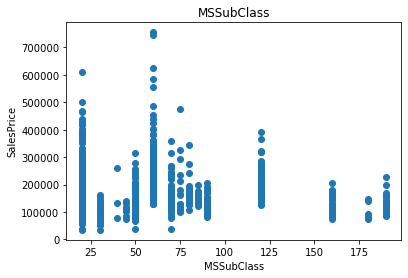

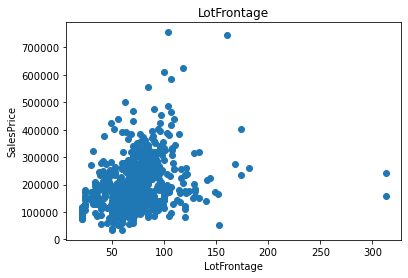

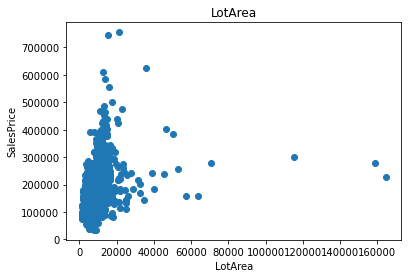

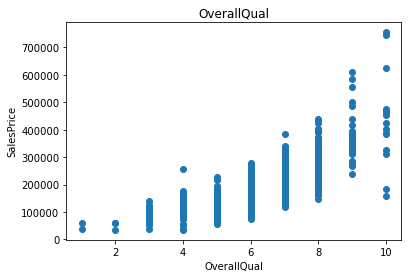

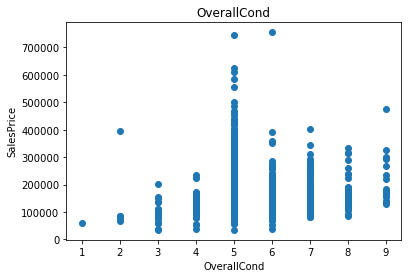

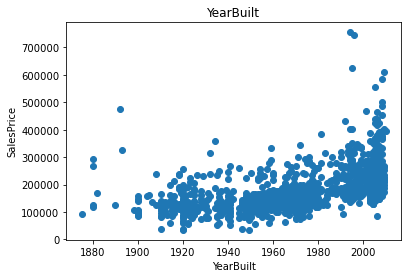

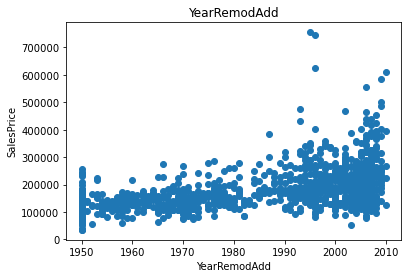

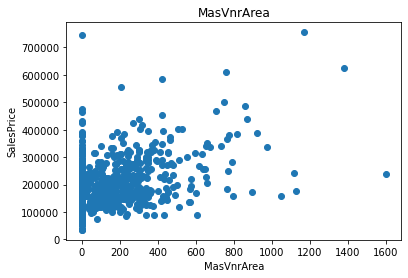

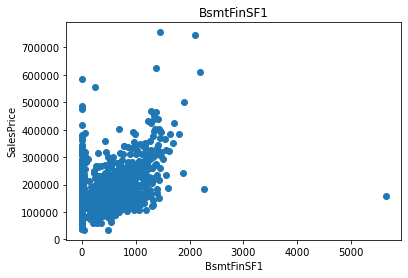

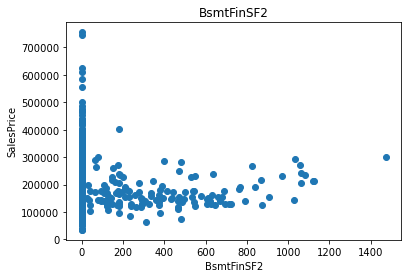

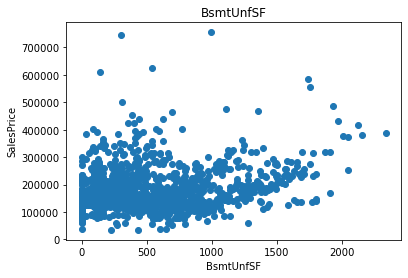

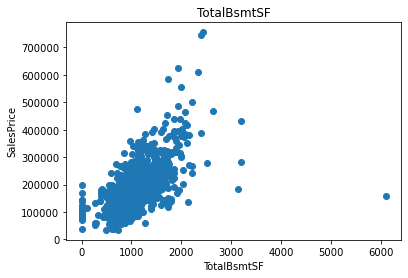

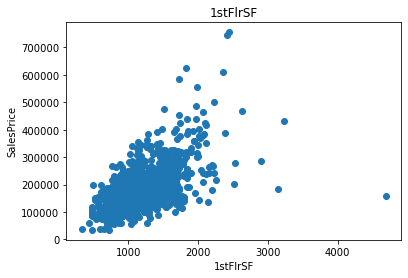

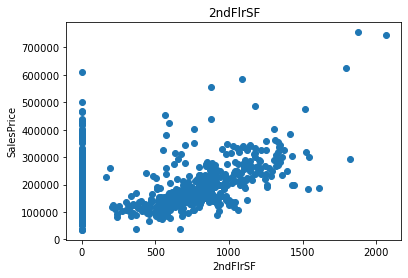

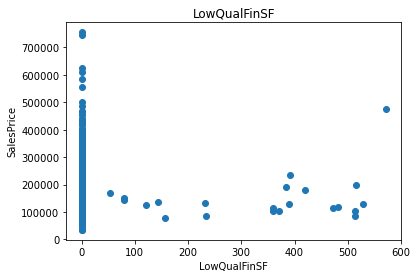

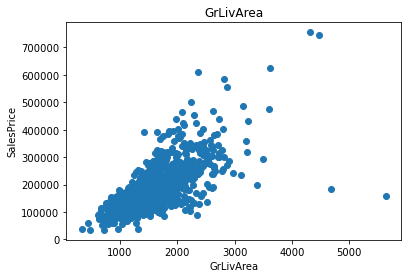

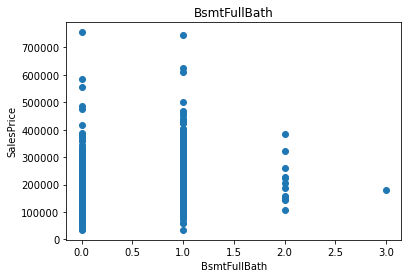

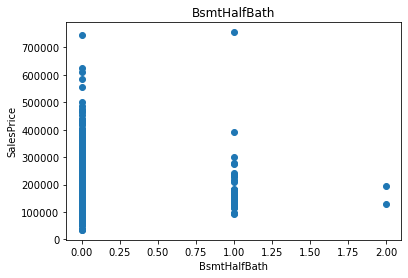

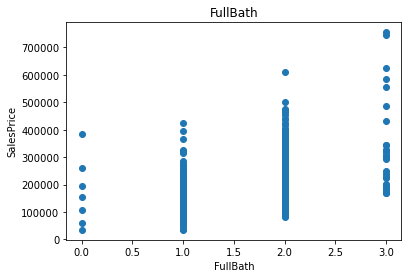

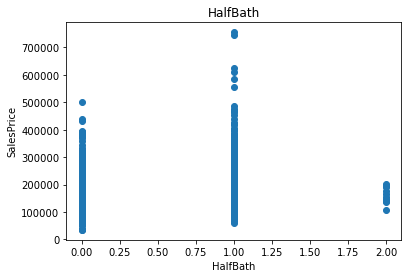

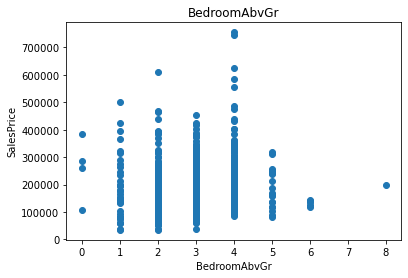

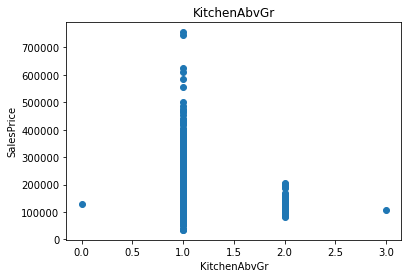

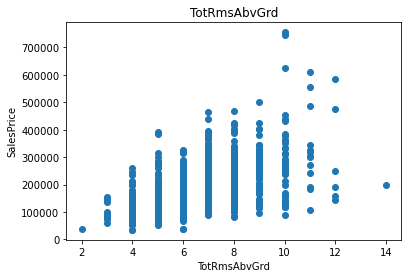

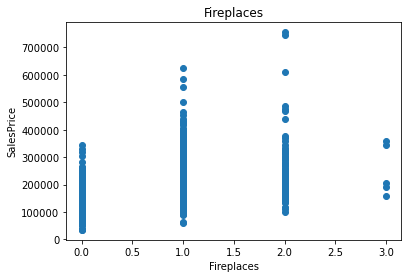

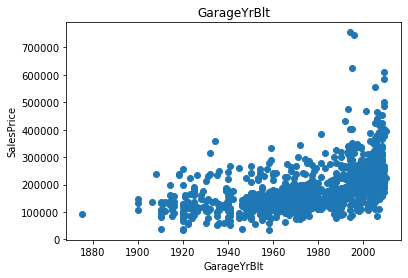

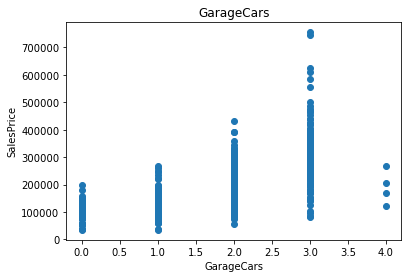

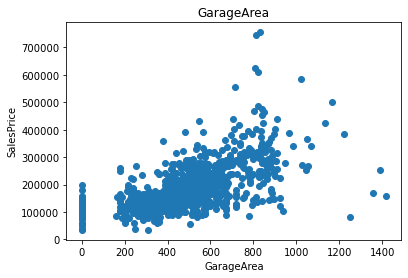

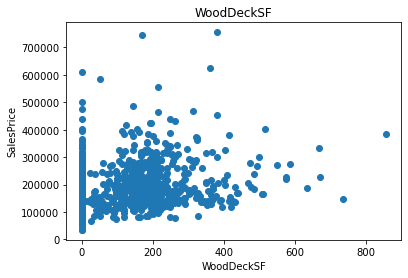

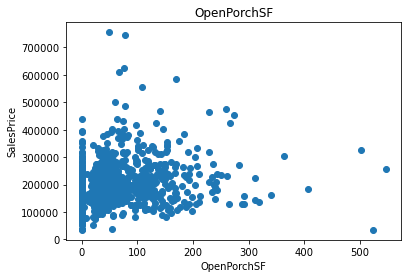

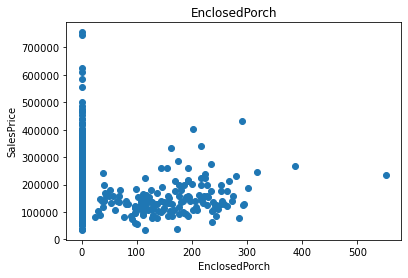

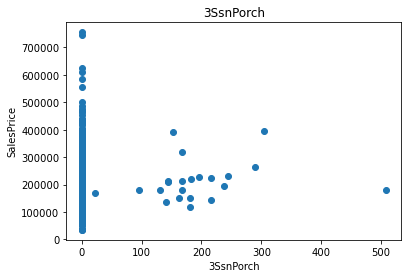

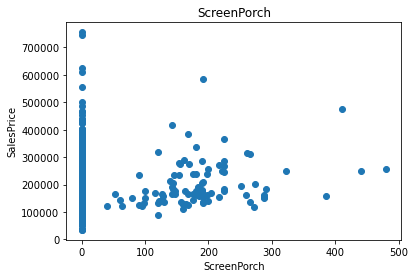

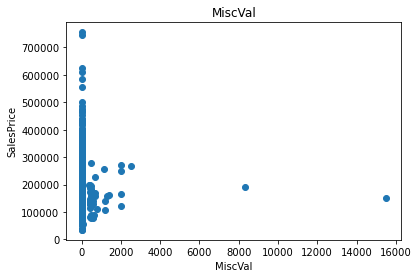

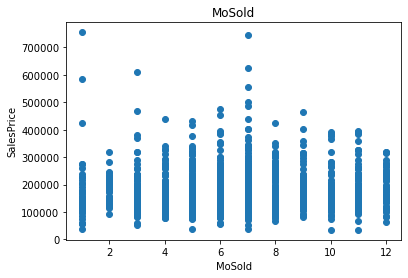

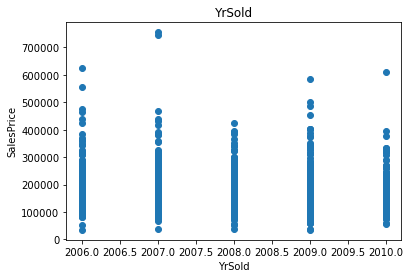

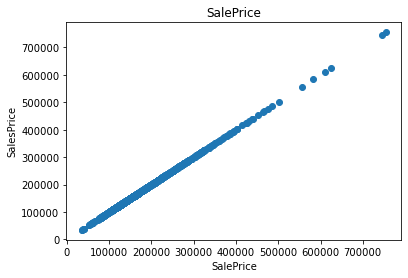

In [19]:
#Visualising sale price wrt to each continuous feature
for i in cont:
    plt.scatter(df_train[i],df_train['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalesPrice')
    plt.title(i)
    plt.show()

### Observations:

-> LotFrontage: Linear feet of street connected to property-: Lot frontage doed not impact much on sale price since houses with different sale price are having same Lot frontage area

-> LotArea: Lot size in square feet-: LotArea doesn't affect sale price of the houses much, as can be seen different sale price are availble within the Lot area range of 0 to 20000.In fact some houses where Lot Area is very large have moderate sale price

-> OverallQual: Rates the overall material and finish of the house-:Overall quality is directly proportional to the sale price of houses

-> YearBuilt: & YearRemodAdd: Houses which are build latest have high sale price in comparison to those build in early years.similar is the case with remodelling date

-> BsmtFinSF1: Type 1 finished square feet-:Total sq ft of basement area is directly proportional to sale price
Houses with higher number of full bathrooms seems having high sale price

-> Kitchen: Kitchens above grade-:houses with 1 kitchen above ground have high sale price in comparison to those having 2 kitchens

-> Fireplaces: Number of fireplaces-:Houses with 1 and 2 fireplaces have higher prices in comparion to houses having 0 or 3 fireplaces

-> Wood deck,Enclosed porch,Three season porch, screen porch,pool area,Miscval do not have impact on sale price

# Multivariate Analysis

In [20]:
df_train.describe()    #Statistical summary of the dataset

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.807363,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.696918,444.726027,46.647260,...,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,47.315068,6.344178,2007.804795,181477.005993
std,41.940650,22.440317,8957.442311,1.390153,1.124343,30.145255,20.785185,182.218483,462.664785,163.520016,...,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,543.264432,2.686352,1.329738,79105.586863
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,...,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,...,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,12.000000,2010.000000,755000.000000


### Observations:

-> Maximum standard deviation of 8957.44 is observed in LotArea column.

-> Maximum SalePrice of a house observed is 755000 and minimum is 34900.

-> In the columns MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed.

-> In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed.

-> In the columns MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.

In [21]:
#Checking correlation of the dataset
corr=df_train.corr()  #corr() function provides the correlation value of each column
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.336234,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.028215,-0.052236,-0.062403,...,-0.092408,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.336234,1.000000,0.296790,0.229981,-0.047851,0.112000,0.089513,0.188273,0.227732,0.001253,...,0.322750,0.087267,0.151044,0.021103,0.050499,0.030440,-0.002830,0.022579,-0.004162,0.323851
LotArea,-0.124151,0.296790,1.000000,0.107188,0.017513,0.005506,0.027228,0.120192,0.221851,0.056656,...,0.195162,0.216720,0.093080,-0.007446,0.025794,0.025256,0.051679,0.015141,-0.035399,0.249499
OverallQual,0.070462,0.229981,0.107188,1.000000,-0.083167,0.575800,0.555945,0.403985,0.219643,-0.040893,...,0.566782,0.227137,0.341030,-0.098374,0.045919,0.059387,-0.025786,0.090638,-0.048759,0.789185
OverallCond,-0.056978,-0.047851,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.135133,-0.028810,0.044336,...,-0.126021,0.012290,-0.024899,0.056074,0.040476,0.069463,0.075178,0.005519,0.055517,-0.065642
YearBuilt,0.023988,0.112000,0.005506,0.575800,-0.377731,1.000000,0.592829,0.318562,0.227933,-0.027682,...,0.473216,0.204830,0.191069,-0.373544,0.037079,-0.058760,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,0.056618,0.089513,0.027228,0.555945,0.080669,0.592829,1.000000,0.178583,0.114430,-0.044694,...,0.387744,0.197410,0.238755,-0.193574,0.064763,-0.046220,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,0.028215,0.188273,0.120192,0.403985,-0.135133,0.318562,0.178583,1.000000,0.263377,-0.064685,...,0.363537,0.152083,0.127876,-0.102142,0.019123,0.047375,-0.027263,0.012707,-0.013220,0.460535
BsmtFinSF1,-0.052236,0.227732,0.221851,0.219643,-0.028810,0.227933,0.114430,0.263377,1.000000,-0.052145,...,0.286290,0.192939,0.108802,-0.082351,0.025485,0.033490,0.008314,0.007482,0.005614,0.362874
BsmtFinSF2,-0.062403,0.001253,0.056656,-0.040893,0.044336,-0.027682,-0.044694,-0.064685,-0.052145,1.000000,...,-0.002051,0.094690,-0.014103,0.032081,-0.031263,0.076561,0.007915,-0.014605,0.038438,-0.010151


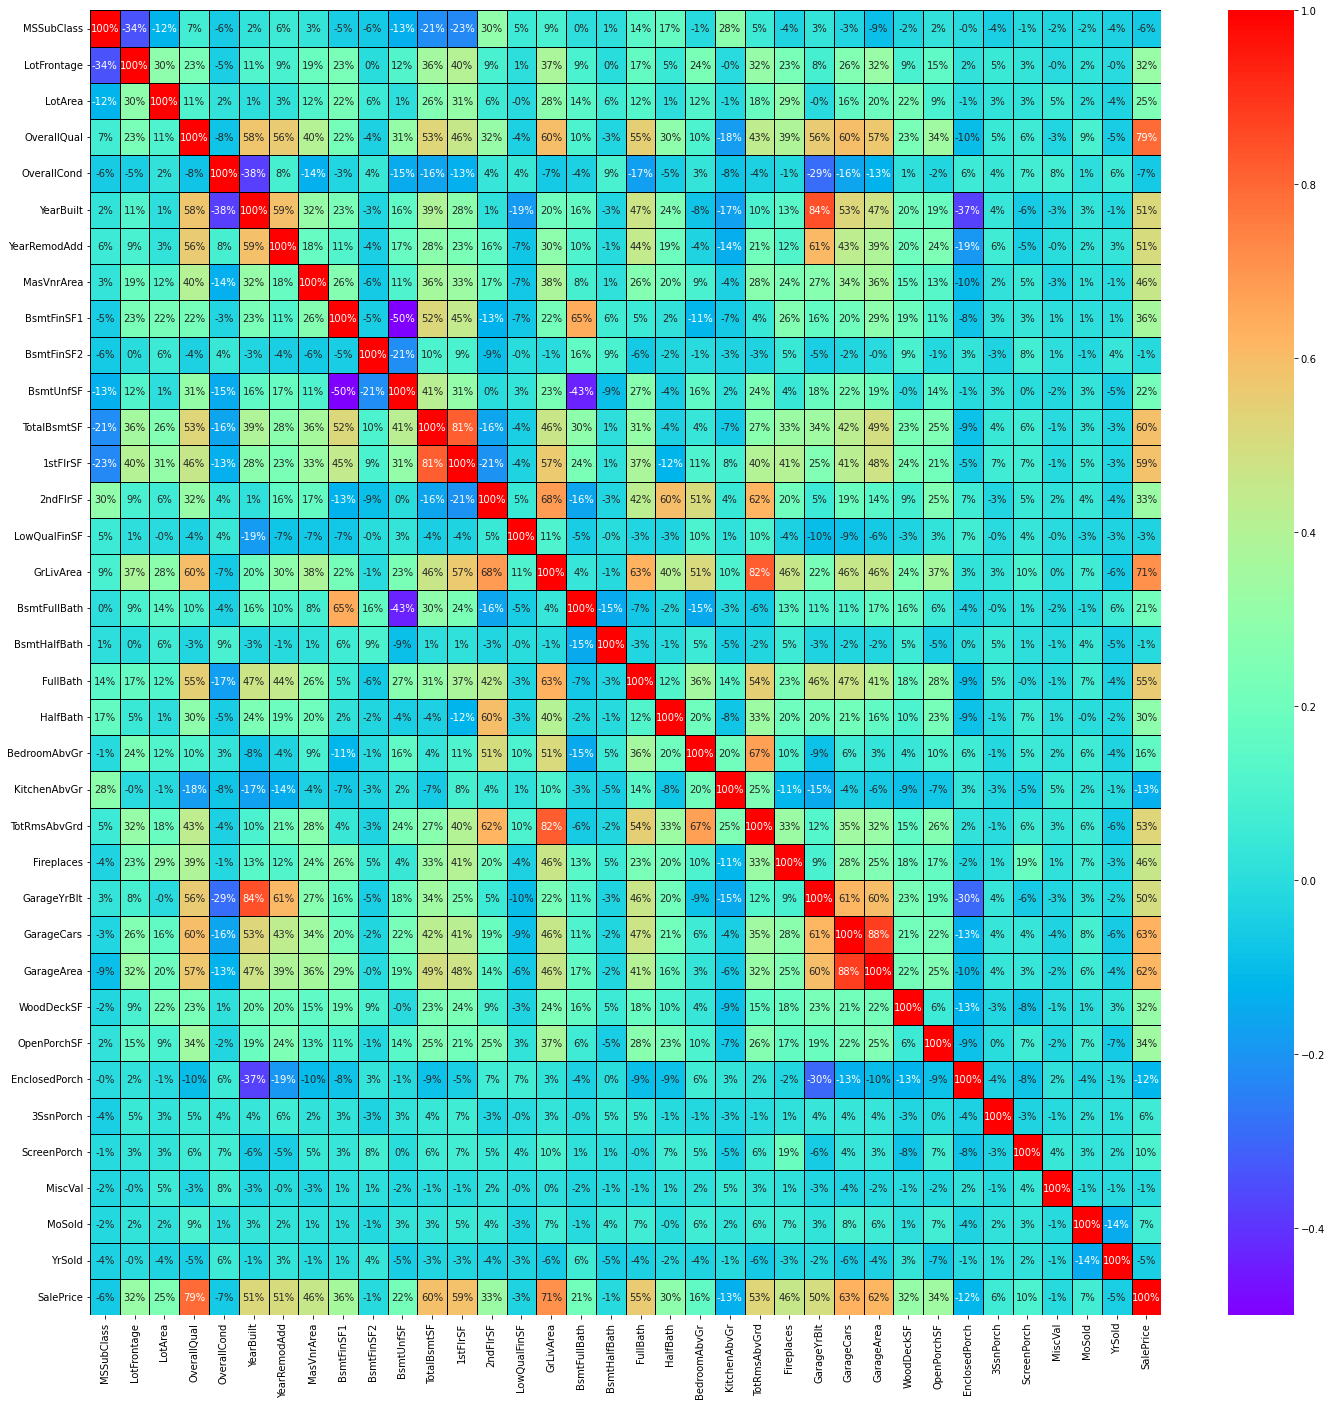

In [22]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(24,24))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

### Observations:

-> SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.

-> SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.

-> We observe multicollinearity in between columns, so we will be using Principal Component Analysis(PCA).

Text(0.5, 1.0, 'Correaltion with target variable SalePrice')

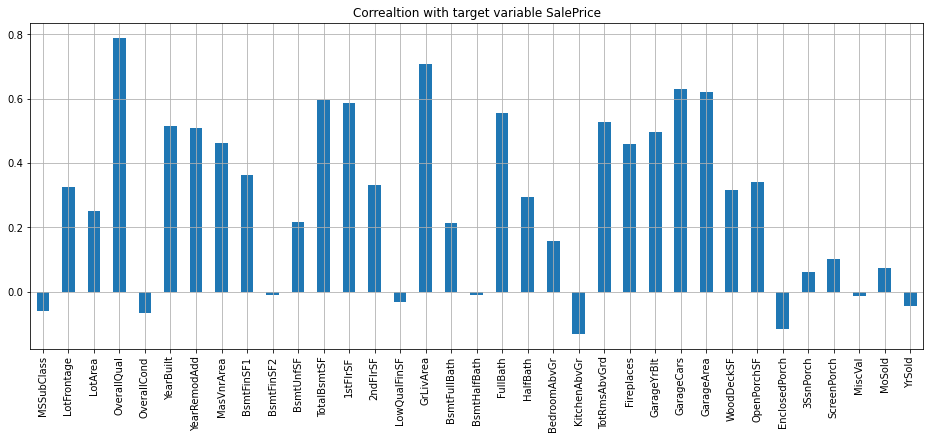

In [23]:
#Checking the correlation with the target variable SalePrice
plt.figure(figsize=(16,6))
df_train.drop('SalePrice', axis=1).corrwith(df_train['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title("Correaltion with target variable SalePrice")

### Observations:

-> 'MSSubClass' ,'OverallCond' ,'OverallCond' ,'LowQualFinSF' ,'BsmtHalfBath' ,'KitchenAbvGr' ,'YrSold', 'EnclosedPorch', 'MiscVal' are negatively correlated with the target column,rest all are positively correlated

-> 'OverallQual' & 'GrLivArea' are highly positively correlated with target column

-> 'MSSubClass' ,'OverallCond' ,'OverallCond' ,'LowQualFinSF' ,'BsmtHalfBath' ,'YrSold', 'MiscVal', 'MoSold', '3SsnPorch' are least correlated with the target column

In [24]:
#Dropping the least correlated columns from the dataset
df_train.drop(['MSSubClass' ,'LowQualFinSF' ,'BsmtHalfBath' ,'BsmtUnfSF' ,'YrSold', 'MiscVal',
               'MoSold', '3SsnPorch'],axis=1,inplace=True)

# Encoding non-numeric data using Label Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['MSZoning','Street','Alley', 'LotShape','LandContour','LotConfig','LandSlope', 'Neighborhood','Condition1','Condition2',
       'BldgType','HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',  'Heating','HeatingQC','CentralAir',
       'Electrical', 'KitchenQual','Functional',  'FireplaceQu', 'GarageType','GarageFinish',  'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'MiscFeature',  'SaleType','SaleCondition', ]
for val in list1:
    df_train[val]=le.fit_transform(df_train[val].astype(str))

# Checking skewness


In [26]:
df_train.skew()

MSZoning         -1.796785
LotFrontage       2.733440
LotArea          10.659285
Street          -17.021969
Alley            -0.203241
                   ...    
Fence            -1.955758
MiscFeature       4.958391
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 69, dtype: float64

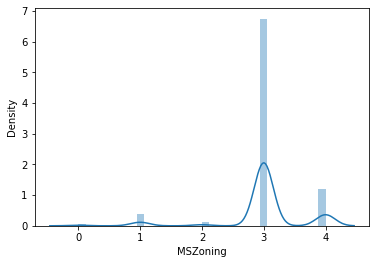

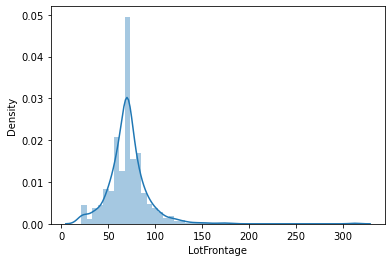

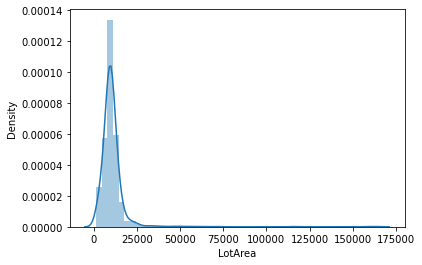

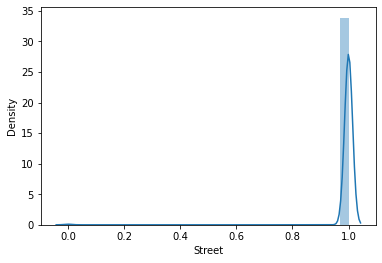

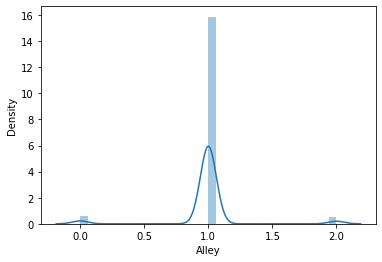

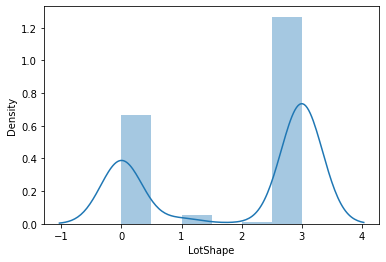

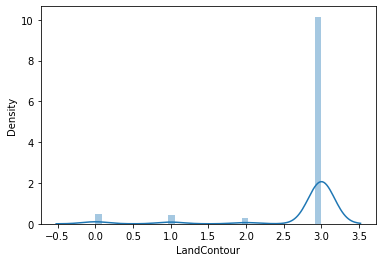

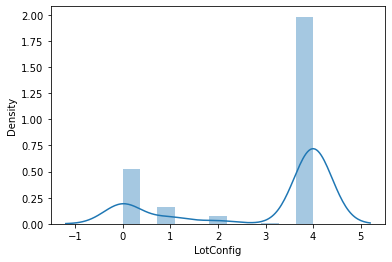

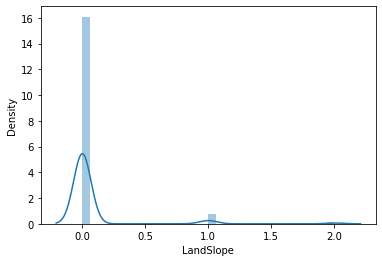

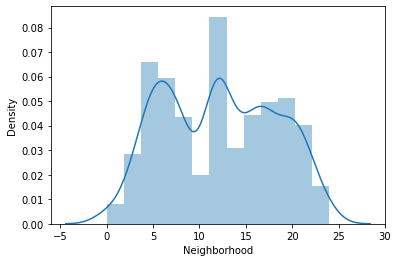

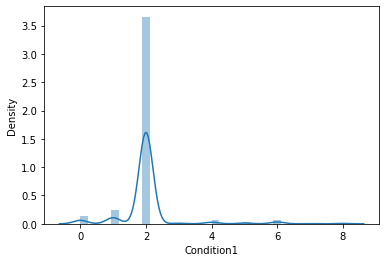

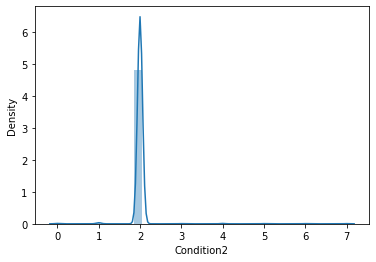

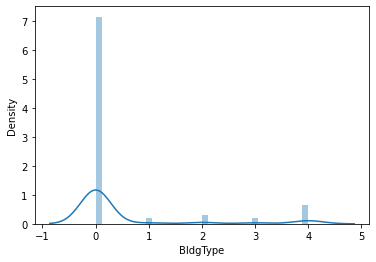

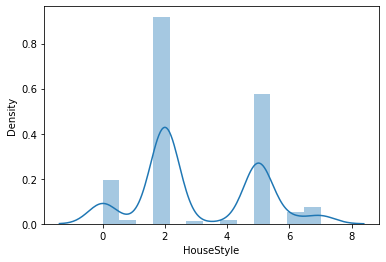

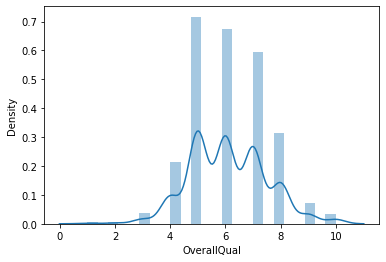

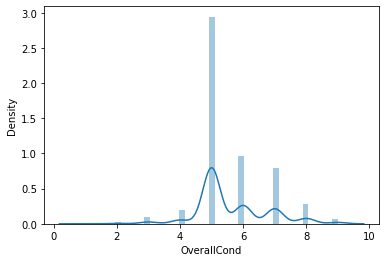

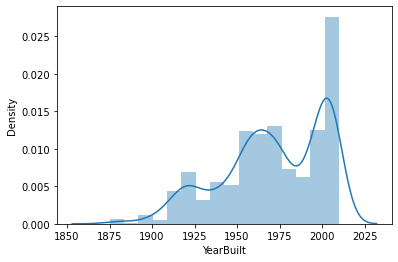

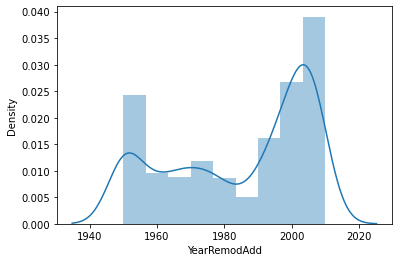

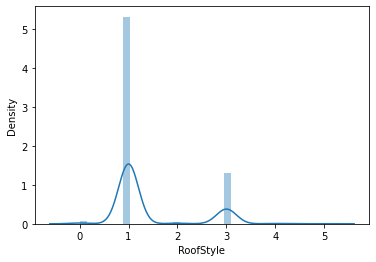

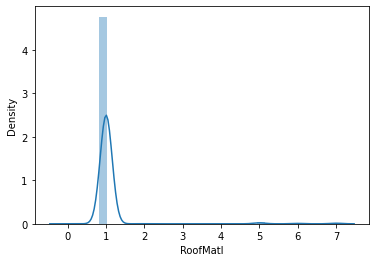

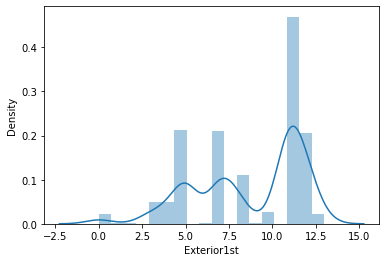

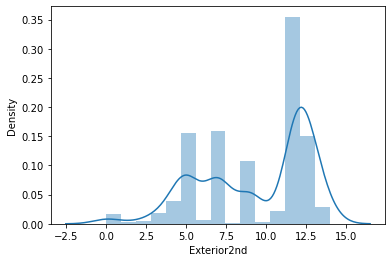

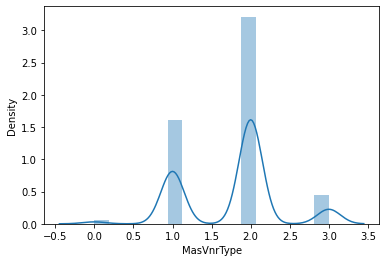

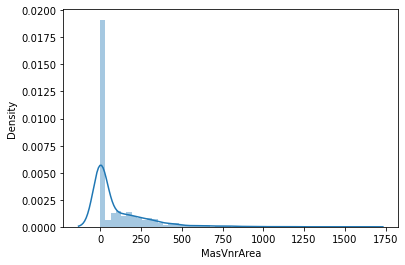

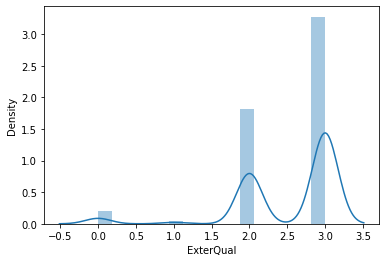

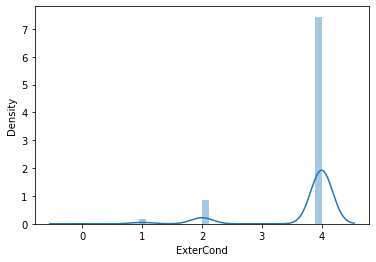

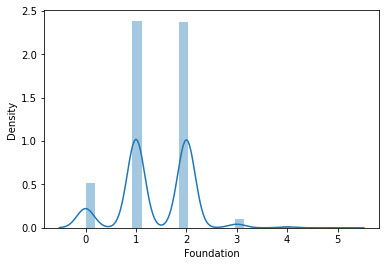

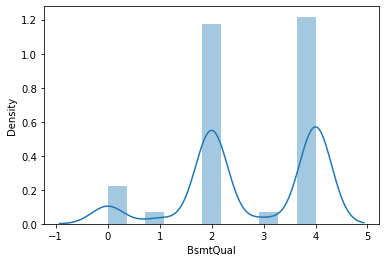

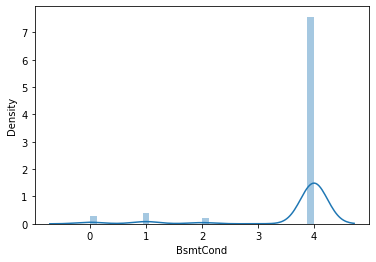

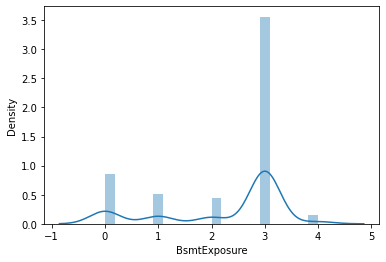

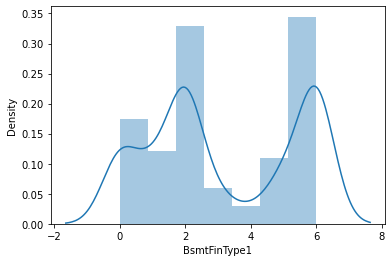

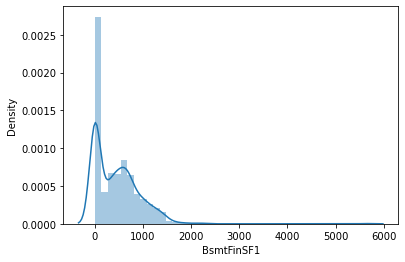

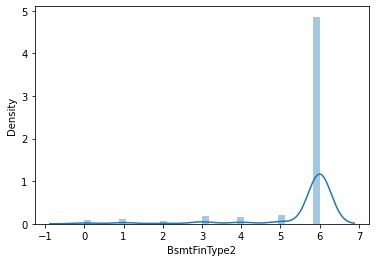

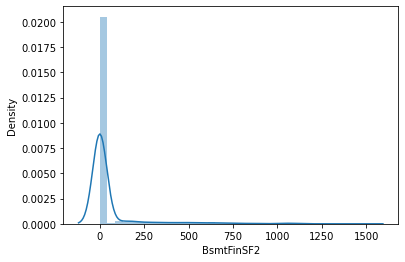

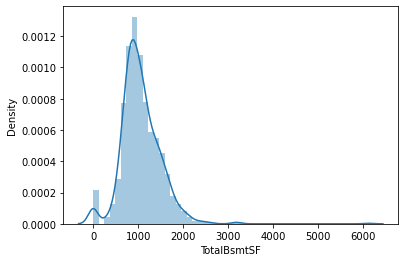

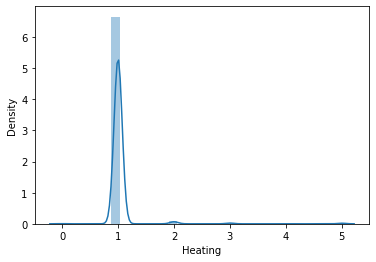

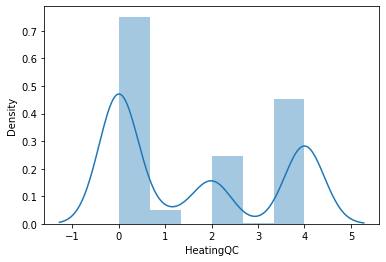

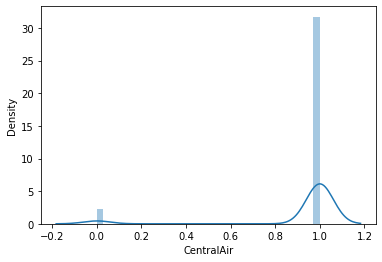

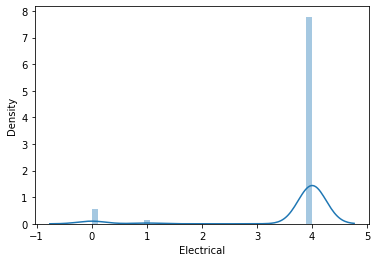

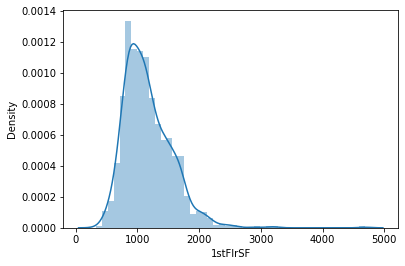

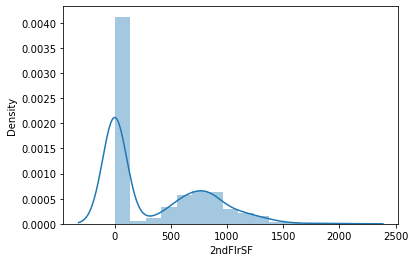

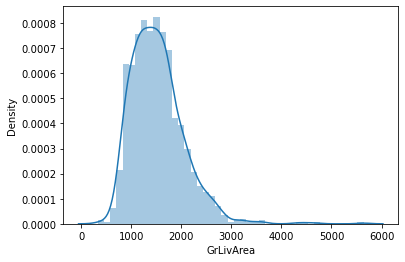

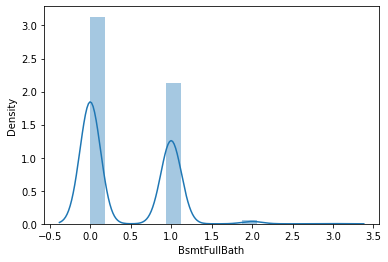

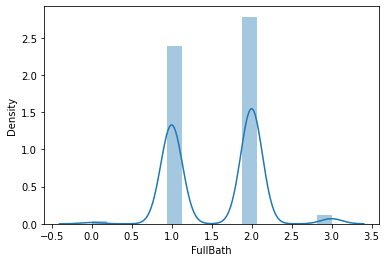

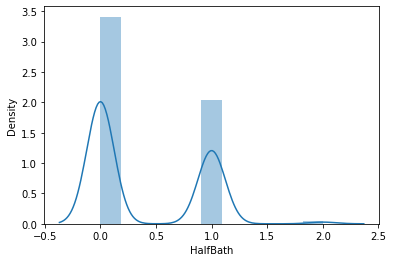

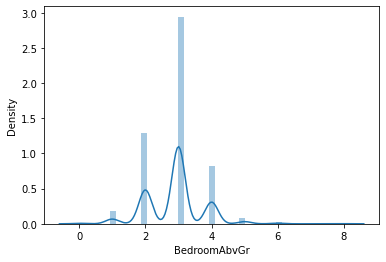

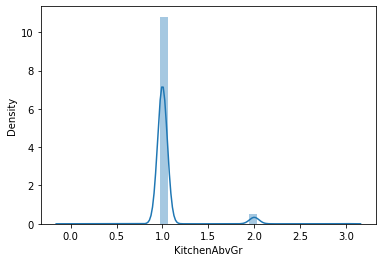

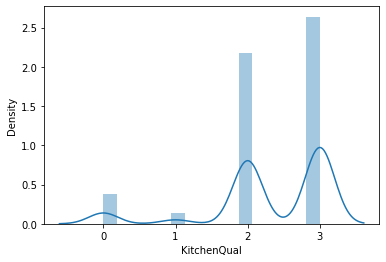

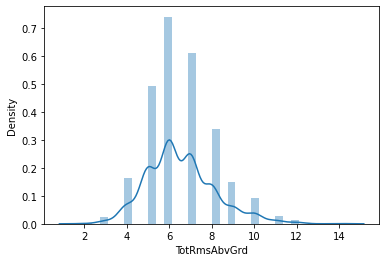

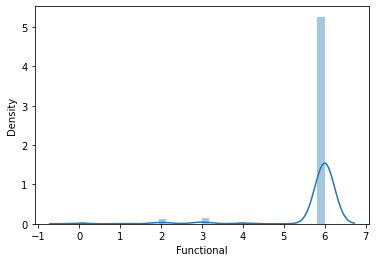

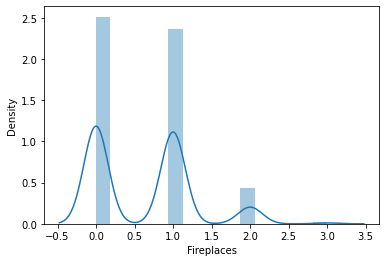

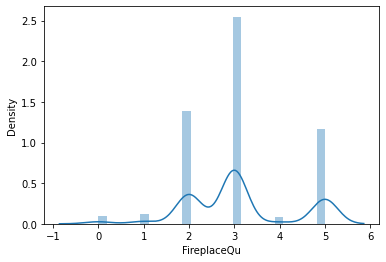

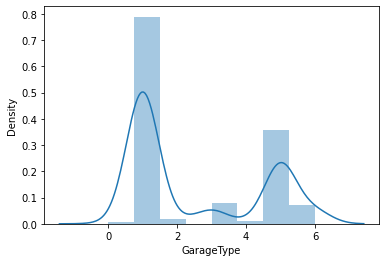

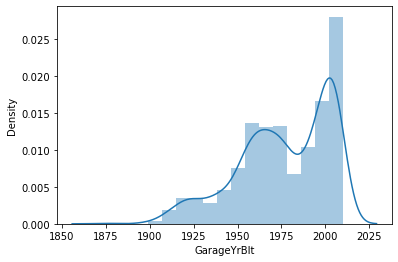

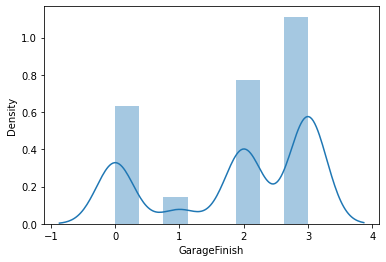

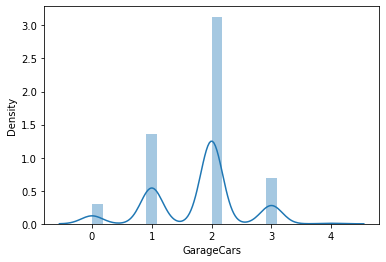

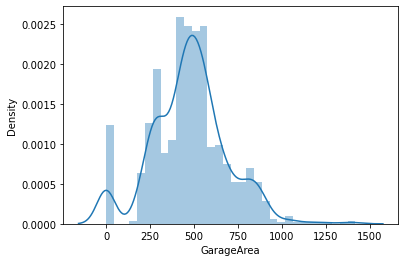

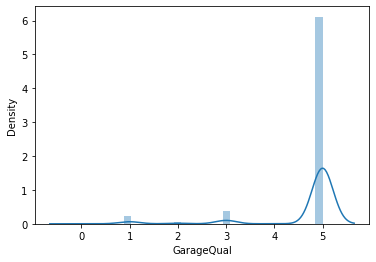

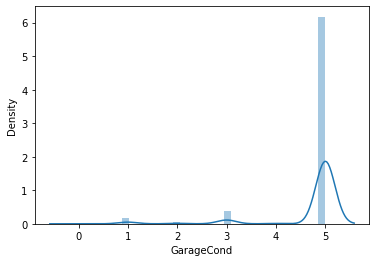

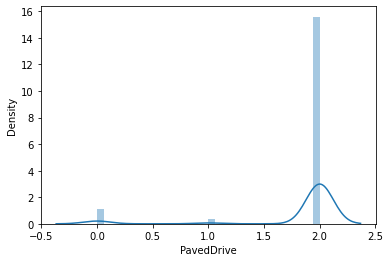

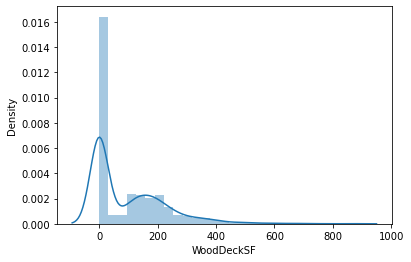

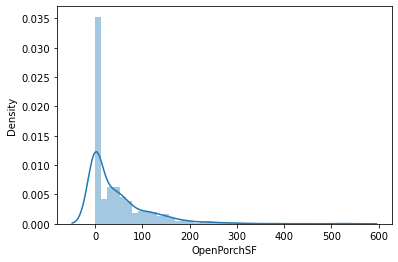

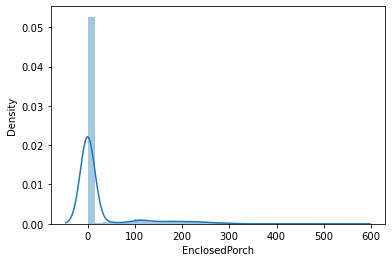

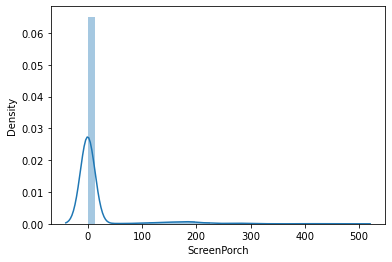

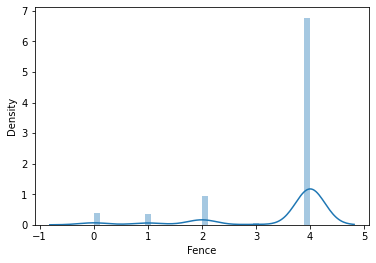

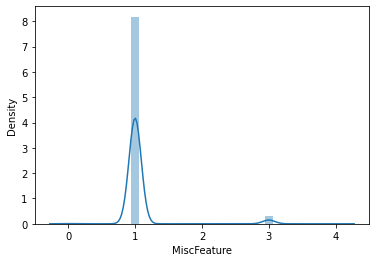

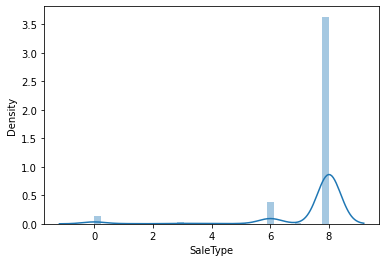

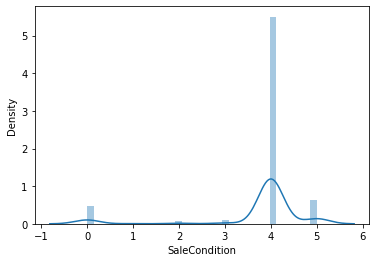

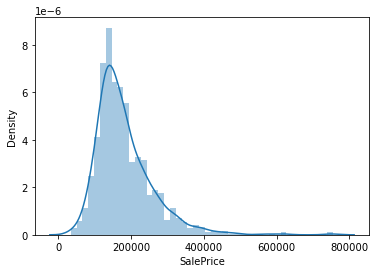

In [27]:
#Plotting distplot for checking the distribution of skewness
for col in df_train.describe().columns:
    sns.distplot(df_train[col])
    plt.show()

We can see that some of the curves are not normally distributed and it is due to the presence of high skewness and we need to handle them

# Checking outliers

MSZoning            AxesSubplot(0.125,0.826831;0.0824468x0.053169)
LotFrontage      AxesSubplot(0.223936,0.826831;0.0824468x0.053169)
LotArea          AxesSubplot(0.322872,0.826831;0.0824468x0.053169)
Street           AxesSubplot(0.421809,0.826831;0.0824468x0.053169)
Alley            AxesSubplot(0.520745,0.826831;0.0824468x0.053169)
                                       ...                        
Fence               AxesSubplot(0.125,0.316408;0.0824468x0.053169)
MiscFeature      AxesSubplot(0.223936,0.316408;0.0824468x0.053169)
SaleType         AxesSubplot(0.322872,0.316408;0.0824468x0.053169)
SaleCondition    AxesSubplot(0.421809,0.316408;0.0824468x0.053169)
SalePrice        AxesSubplot(0.520745,0.316408;0.0824468x0.053169)
Length: 69, dtype: object

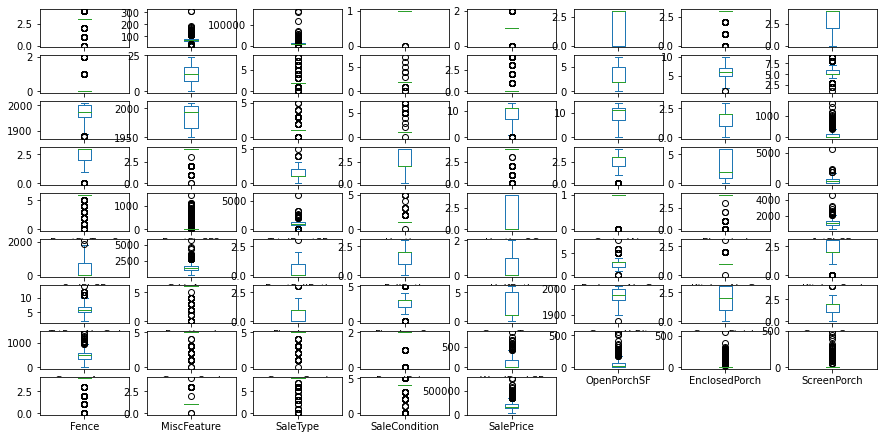

In [28]:
df_train.plot(kind='box',subplots=True,layout=(12,8),figsize=(15,10))

We can see that there are outliers in the dataset and we can handle them by using z-score method

# Handling outliers by using z-score method

In [29]:
#removing outliers
from scipy.stats import zscore
z_score=abs(zscore(df_train))
print(df_train.shape)

df_newtrain=df_train.loc[(z_score<6).all(axis=1)]
print(df_newtrain.shape)

(1168, 69)
(1095, 69)


When we apply z-score of 3 , 57% of the data is lost (due to the wide spread of most of the data). We compromised by enlarging the z-score cut-off to 6 resulting in a loss of few data.

# Preparing dataset for model training

In [30]:
df_x=df_newtrain.drop(columns=['SalePrice'])
y=df_newtrain['SalePrice']

In [31]:
#Checking x data
df_x.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,SaleType,SaleCondition
0,3,70.0,4928,1,1,0,3,4,0,13,...,5,2,0,205,0,0,4,1,8,4
2,3,92.0,9920,1,1,0,3,1,0,15,...,5,2,180,130,0,0,4,1,8,4
3,3,105.0,11751,1,1,0,3,4,0,14,...,5,2,0,122,0,0,2,1,0,4
4,3,70.0,16635,1,1,0,3,2,0,14,...,5,2,240,0,0,0,4,1,8,4
5,3,58.0,14054,1,1,0,3,4,0,8,...,5,2,100,17,0,0,4,1,6,5


In [32]:
#Checking y data after splitting
y.head()

0    128000
2    269790
3    190000
4    215000
5    219210
Name: SalePrice, dtype: int64

# Treating skewness

In [33]:
#We are treating skewness by using square root transform
import numpy as np
for col in df_x.skew().index:
    if col in df_x.describe().columns:
        if df_x[col].skew()>0.55:
            df_x[col]=np.sqrt(df_x[col])
        if df_x[col].skew()<-0.55:
            df_x[col]=np.sqrt(df_x[col])   

In [34]:
df_x.skew()   #Checking skewness after treating it

MSZoning        -3.545090
LotFrontage     -0.236909
LotArea          0.304655
Street           0.000000
Alley           -0.174215
                   ...   
ScreenPorch      3.364416
Fence           -2.816227
MiscFeature      4.459805
SaleType        -4.399310
SaleCondition   -3.286506
Length: 68, dtype: float64

# Scaling the data

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [35]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,SaleType,SaleCondition
0,0.045740,0.074811,-1.267021,0.0,0.014247,-1.435050,0.275363,0.560583,-0.204609,0.147523,...,0.268178,0.270750,-0.910900,2.020925,-0.396732,-0.282325,0.417456,-0.171971,0.283327,0.236047
1,0.045740,1.102980,0.160834,0.0,0.014247,-1.435050,0.275363,-0.726254,-0.204609,0.481624,...,0.268178,0.270750,0.963602,1.413902,-0.396732,-0.282325,0.417456,-0.171971,0.283327,0.236047
2,0.045740,1.652949,0.588365,0.0,0.014247,-1.435050,0.275363,0.560583,-0.204609,0.314574,...,0.268178,0.270750,-0.910900,1.339713,-0.396732,-0.282325,-0.860325,-0.171971,-5.010502,0.236047
3,0.045740,0.074811,1.587624,0.0,0.014247,-1.435050,0.275363,-0.193229,-0.204609,0.314574,...,0.268178,0.270750,1.253588,-0.959545,-0.396732,-0.282325,0.417456,-0.171971,0.283327,0.236047
4,0.045740,-0.555343,1.081204,0.0,0.014247,-1.435050,0.275363,0.560583,-0.204609,-0.687730,...,0.268178,0.270750,0.486271,-0.101258,-0.396732,-0.282325,0.417456,-0.171971,-0.425912,0.701476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.045740,0.074811,0.136146,0.0,0.014247,-1.435050,0.275363,0.560583,-0.204609,1.149826,...,0.268178,0.270750,-0.910900,-0.959545,-0.396732,-0.282325,-0.860325,-0.171971,0.283327,0.236047
1091,0.045740,-0.077307,-0.126372,0.0,0.014247,0.718496,0.275363,0.560583,-0.204609,-0.854780,...,0.268178,-3.955457,-0.910900,1.080048,-0.396732,-0.282325,-0.860325,-0.171971,0.283327,0.236047
1092,0.045740,-2.835490,-2.357377,0.0,0.014247,0.718496,0.275363,-0.193229,-0.204609,0.147523,...,0.268178,0.270750,0.392295,-0.959545,-0.396732,-0.282325,0.417456,-0.171971,0.283327,0.236047
1093,-7.498944,-1.012502,-0.198747,0.0,3.914429,0.718496,0.275363,0.560583,-0.204609,-0.520679,...,-5.104820,-3.955457,-0.910900,0.570150,2.558134,-0.282325,-0.860325,-0.171971,0.283327,0.236047


# Using PCA Technique

In [36]:
# PCA is required for the analysis to reduce curse of Dimensionality & at the same time minimizing information loss 
from sklearn.decomposition import PCA
for i in range(20,50):
    pca = PCA(n_components=i)
    x_pca=pca.fit_transform(x)
    print(i," variance :{}".format(np.sum(pca.explained_variance_ratio_)))

20  variance :0.6452253664772015
21  variance :0.6602625335171226
22  variance :0.6754057829658764
23  variance :0.6895043198419984
24  variance :0.7034848899633452
25  variance :0.7164536223584513
26  variance :0.7298925855816318
27  variance :0.7431377056037516
28  variance :0.7553372562818998
29  variance :0.7672401712183258
30  variance :0.7789931402251947
31  variance :0.7906254951160377
32  variance :0.8018254007969284
33  variance :0.8125891575048155
34  variance :0.8227869702253843
35  variance :0.8328379580286585
36  variance :0.8424242178770179
37  variance :0.8520537381586674
38  variance :0.8614199181369429
39  variance :0.8703082601383706
40  variance :0.8790708236206473
41  variance :0.8878293934997614
42  variance :0.8959622707334006
43  variance :0.9036298315972472
44  variance :0.9110505424291948
45  variance :0.9178745501699781
46  variance :0.9244504886538057
47  variance :0.9308619436344002
48  variance :0.9369441566779573
49  variance :0.9427476480722553


In [37]:
#As 49 has the highest value, we will select that
pca = PCA(n_components=49)
x=pca.fit_transform(x)

# Building the model

In [38]:
#Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [39]:
#Finding the best random state
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 85 is 0.911233503618774


We can see that at random_state=85, the best r2_score is obtained so that we can create our train_test_split with this random state

In [40]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=.20)

# Finding the best model 

In [41]:
#Importing the algorithms and other parameters
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [42]:
LR=LinearRegression()
l=Lasso()
en=ElasticNet()
rd=Ridge()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

In [43]:
models= []
models.append(('Linear Regression',LR))
models.append(('Lasso Regression',l))
models.append(('Elastic Net Regression',en))
models.append(('Ridge Regression',rd))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))

In [44]:
#Importing required metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [45]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
sd=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('r2_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=5,scoring='r2').std()
    print('Standard Deviation: ',std)
    sd.append(std)
    print('\n')
    MAE=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


r2_score:  0.911233503618774


cross_val_score:  0.8534492446989489


Standard Deviation:  0.027890808395899268


Mean Absolute Error:  16244.71261601634


Mean Squared Error:  492797544.4974446


Root Mean Squared Error:  22199.04377439363



****************************** Lasso Regression ***************************


Lasso()


r2_score:  0.9112393932186538


cross_val_score:  0.8538817683766273


Standard Deviation:  0.027240603734438984


Mean Absolute Error:  16244.084761333617


Mean Squared Error:  492764847.69767004


Root Mean Squared Error:  22198.307316047096



****************************** Elastic Net Regression ***************************


ElasticNet()


r2_score:  0.907883493262059


cross_val_score:  0.8659199235412007


Standard Deviation:  0.021661485011818412


Mean Absolute Error:  15890.461145088382


Mean Squared Error:  511395517.21386343


Root Mean Squared Erro

In [46]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'r2_score': score, 'Cross_val_score':cvs, 'Standard_deviation':sd,
                    'Mean_absolute_error':mae, 'Mean_squared_error':mse, 'Root_Mean_Squared_error':rmse})
result

,Model,r2_score,Cross_val_score,Standard_deviation,Mean_absolute_error,Mean_squared_error,Root_Mean_Squared_error
0,Linear Regression,91.123350,85.344924,0.027891,16244.712616,4.927975e+08,22199.043774
1,Lasso Regression,91.123939,85.388177,0.027241,16244.084761,4.927648e+08,22198.307316
2,Elastic Net Regression,90.788349,86.591992,0.021661,15890.461145,5.113955e+08,22614.055744
3,Ridge Regression,91.125323,85.511702,0.025451,16242.021102,4.926880e+08,22196.577102
4,Support Vector Regressor,-7.442555,-6.226712,0.058896,53839.409135,5.964799e+09,77232.108535
5,Decision Tree Regressor,77.201933,72.777708,0.031592,25499.675799,1.265661e+09,35576.133195
6,KNeighbors Regressor,86.848778,80.378278,0.027808,19910.335160,7.301054e+08,27020.463191


We can see that Ridge and Lasso Regression algorithms are performing well, as compared to other algorithms. Now we will try Hyperparameter Tuning to find out the best parameters and try to increase their scores.

# Hyperparameter Tuning

### Lasso 

In [47]:
from sklearn.model_selection import GridSearchCV
#Creating parameter list to pass in GridSearchCV
parameters={'alpha' :[0.001, 0.01, 0.1, 1], 'random_state':range(42, 100), 'selection':['cyclic','random']}

In [48]:
#Using GridSearchCV to run the parameters and checking final r2_score
l=Lasso()
grid=GridSearchCV(l,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'alpha': 1, 'random_state': 70, 'selection': 'random'}
0.8240964553902316


In [49]:
#Using the best parameters obtained
l=Lasso(alpha=1, random_state=65, selection='random')
l.fit(x_train,y_train)
pred=l.predict(x_test)
print('Final r2_score after tuning is: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(l,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(l,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

Final r2_score after tuning is:  91.12396211723741
Cross validation score:  85.38873857549368
Standard deviation:  0.02723178845973367


Mean absolute error:  16244.026740685134
Mean squared error:  492763582.18603903
Root Mean squared error:  22198.278811341184


### Ridge

In [50]:
#Creating parameter list to pass in GridSearchCV
parameters={'alpha' :[0.001, 0.01, 0.1, 1], 'random_state':range(42, 100), 'solver':['auto','lsqr','svd']}

In [51]:
#Using GridSearchCV to run the parameters and checking final r2_score
rd=Ridge()
grid=GridSearchCV(rd,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'alpha': 1, 'random_state': 42, 'solver': 'lsqr'}
0.8300216390619044


In [52]:
#Using the best parameters obtained
rd=Ridge(alpha=1, random_state=42, solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('Final r2_score after tuning is: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(rd,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(rd,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

Final r2_score after tuning is:  91.11889030757494
Cross validation score:  85.51689846079196
Standard deviation:  0.02530779227491208


Mean absolute error:  16254.054332044538
Mean squared error:  493045149.60727555
Root Mean squared error:  22204.620005919387


After Tuning the best algorithms, we can see that Lasso Regression has been improved slightly, i.e, r2_score from 91.09175 to 91.09179 and the errors have been decreased. Now, we will try Ensemble techniques like RandomForestRegressor, AdaBoostRegressor and GradientBoostingRegressor to boost up our scores.

# Ensemble Techniques for boosting our scores 

### Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=85)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500]}
grid=GridSearchCV(rfr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'n_estimators': 500}
0.8442473530577352


In [54]:
#Using the best parameters obtained
RF=RandomForestRegressor(random_state=85, n_estimators=500)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(RF,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  92.36945212290395
Cross validation score:  85.31966386144688
Standard deviation:  0.01901078094084167


Mean absolute error:  15172.07496803653
Mean squared error:  423618753.7304246
Root Mean squared error:  20582.00072224332


### AdaBoost Regressor

In [55]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor(random_state=85)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500,1000],'learning_rate':[0.001,0.01,0.1,1],'loss':['linear','square']}
grid=GridSearchCV(adr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 100}
0.8086726179989604


In [56]:
#Using the best parameters obtained
adr=AdaBoostRegressor(random_state=85, n_estimators=1000, learning_rate=1, loss='square')
adr.fit(x_train,y_train)
pred=adr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(adr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(adr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  87.38034157786797
Cross validation score:  82.319388547482
Standard deviation:  0.02993020103970822


Mean absolute error:  20502.21961328553
Mean squared error:  700595037.131426
Root Mean squared error:  26468.755866708696


### Gradient Boosting Regressor

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=85)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500,1000]}
grid=GridSearchCV(gbr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'n_estimators': 1000}
0.8699909019658936


In [58]:
#Using the best parameters obtained
gbr=GradientBoostingRegressor(random_state=85, n_estimators=500)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  92.3865257740243
Cross validation score:  86.96237071467543
Standard deviation:  0.01535080337499264


Mean absolute error:  14958.996156153959
Mean squared error:  422670890.100482
Root Mean squared error:  20558.961308891117


After applying Ensemble Techniques, we can see that GradientBoostingRegressor is the best performing algorithm among all other algorithms as it is giving a r2_score of 92.69 and cross validation score of 86.97. It has also the less amount of error values obtained. Lesser the RMSE score, the better the model. Now we will finalize the model.

# Finalizing the model

In [59]:
gbr_prediction=gbr.predict(x)
print('Predictions of GradientBoosting Regressor: ',gbr_prediction)   #Printing the predicted values

Predictions of GradientBoosting Regressor:  [128881.10184102 243969.54753871 192788.57960721 ... 149720.85624493
  40122.90591504 184854.01932343]


In [60]:
#Saving the model
import pickle
filename='HousingPrice_Project.pkl'   #Specifying the filename
pickle.dump(gbr,open(filename,'wb'))  

# Saving the predicted values

In [61]:
train_results=pd.DataFrame(gbr_prediction)
train_results.to_csv('HousingPrice_Project_TrainDataResults.csv')

Now, we have saved the model which has the predictions of the training data we had used. Next, we will use the test data and find the predictions using the best model we obtained